In [422]:
import astropy.io
from astropy.io import fits
import dust_extinction
from astropy.modeling.models import BlackBody
import astropy.units as u
from dust_extinction.parameter_averages import F19
#import astroquery
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from io import StringIO 
import pandas as pd

In [423]:
## BATTISTI HST DATA
# source paper: https://ui.adsabs.harvard.edu/abs/2022MNRAS.513.4431B/abstract

#import dat files:
Battisti3DHST = np.genfromtxt('stacklist_3DHST.dat', names=True)
print(Battisti3DHST.dtype.names)
Battisti3DHST = pd.DataFrame(Battisti3DHST)
BattistiWISP= np.genfromtxt('stacklist_WISP_sample.dat', names=True)
print(BattistiWISP.dtype.names)
BattistiWISP = pd.DataFrame(BattistiWISP)

# 3D-HST
foiii3D = Battisti3DHST['foiii']
foii3D = Battisti3DHST['foii']
eoiii3D = Battisti3DHST['eoiii']
fhanii3D = Battisti3DHST['fhanii']
ehanii3D = Battisti3DHST['ehanii']
# WISP
foiiiWISP = BattistiWISP['foiii']
foiiWISP = BattistiWISP['foii']
eoiiiWISP = BattistiWISP['eoiii']
fhaniiWISP = BattistiWISP['fhanii']
ehaniiWISP = BattistiWISP['ehanii']
idwisp = BattistiWISP['ID']
fieldwisp = BattistiWISP['Field']
#print(idwisp[111])
#print(fieldwisp[111])

# filter out S/N < 3 
# check how many sources have S/N>3 in both oiii and hanii (Ha+[NII])
# could add rest of list back as non detections

SN_3DHST = Battisti3DHST.loc[((foiii3D / eoiii3D) > 3 ) & ((fhanii3D / ehanii3D) > 3)]
# no AGNs 
SN_3DHST_AGN = SN_3DHST.loc[SN_3DHST['AGN_flag'] > 0]
Nondet_3DHST = Battisti3DHST.loc[((foiii3D / eoiii3D) < 3 ) & ((fhanii3D / ehanii3D) < 3)]
NondetOIII_3DHST = Battisti3DHST.loc[((foiii3D / eoiii3D) < 3 )]
NondetHaNII_3DHST = Battisti3DHST.loc[((fhanii3D / ehanii3D) < 3)]
#print(len(SN_3DHST_AGN['AGN_flag']))

SN_WISP = BattistiWISP.loc[((foiiiWISP / eoiiiWISP) > 3 ) & ((fhaniiWISP / ehaniiWISP) > 3)]
# no AGNS
SN_WISP_AGN = SN_WISP.loc[SN_WISP['AGN_flag'] > 0]
Nondet_WISP = BattistiWISP.loc[((foiiiWISP / eoiiiWISP) < 3 ) & ((fhaniiWISP / ehaniiWISP) < 3)]
NondetOIII_WISP= BattistiWISP.loc[((foiiiWISP / eoiiiWISP) < 3 )]
NondetHaNII_WISP= BattistiWISP.loc[((fhaniiWISP / ehaniiWISP) < 3)]
# 21 galaxies in the S/N WISP data set do not have Hb detections
SN_WISP_NO_hb = SN_WISP.loc[SN_WISP['fhb'] < 0]
# 0 galaxies in the S/N 3D HST data set do not have Hb detections
SN_3DHST_NO_hb = SN_3DHST.loc[SN_3DHST['fhb'] < 0]
#print(len(SN_WISP_AGN['AGN_flag']))

print(len(BattistiWISP['foiii']))
print(len(SN_WISP['foiii']))
print(len(Nondet_WISP['foiii']))
print(len(NondetOIII_WISP['foiii']))
print(len(NondetHaNII_WISP['foiii']))
#print(len(BattistiWISP['foiii']))
#print(len(SN_WISP['foiii']))
#print(len(SN_3DHST_NO_hb['foiii']))

## BATTISTI SDSS DATA (for comparison)
# source paper: https://ui.adsabs.harvard.edu/abs/2022MNRAS.513.4431B/abstract

#import dat files:
BattistiSpecLine = np.genfromtxt('SDSS_DR7_sfg_lines.dat', names=True)
BattistiSpecProp = np.genfromtxt('SDSS_DR7_sfg_prop.dat', names=True)
print(BattistiSpecLine.dtype.names)
#BattistiSpecLine = pd.DataFrame(BattistiSpecLine)
#BattistiSpecLine = BattistiSpecLine.loc[BattistiSpecLine['OII_3726'] + BattistiSpecLine['OII_3729'] > 0]
print(len(BattistiSpecLine['z']))
print(len(BattistiSpecProp['z']))

('Field', 'ID', 'z', 'logM', 'logSFR', 'beta_obs', 'beta_obs_err', 'beta_SED', 'foiii', 'eoiii', 'EW_oiii_obs', 'fhb', 'ehb', 'fhanii', 'ehanii', 'EW_hanii_obs', 'fsii', 'esii', 'foii', 'eoii', 'AGN_flag', 'n_UV_filt', 'L_2800_sun_obs', 'L_2800_sun_SED')
('Field', 'ID', 'z', 'logM', 'logSFR', 'beta_obs', 'beta_obs_err', 'beta_SED', 'foiii', 'eoiii', 'EW_oiii_obs', 'fhb', 'ehb', 'fhanii', 'ehanii', 'EW_hanii_obs', 'fsii', 'esii', 'foii', 'eoii', 'fsiii_9069', 'esiii_9069', 'fsiii_9532', 'esiii_9532', 'AGN_flag', 'grism_flag')
1767
705
5
775
292
('RA', 'DEC', 'z', 'OII_3726', 'OII_3726_err', 'OII_3729', 'OII_3729_err', 'Hb', 'Hb_err', 'OIII_4959', 'OIII_4959_err', 'OIII_5007', 'OIII_5007_err', 'NII_6548', 'NII_6548_err', 'Ha', 'Ha_err', 'NII_6584', 'NII_6584_err', 'SII_6717', 'SII_6717_err', 'SII_6731', 'SII_6731_err', 'oii', 'oiii', 'ha_nii', 'tau', 'EW_ha', 'EW_ha_err')
152831
152831


0.123149
10.4885


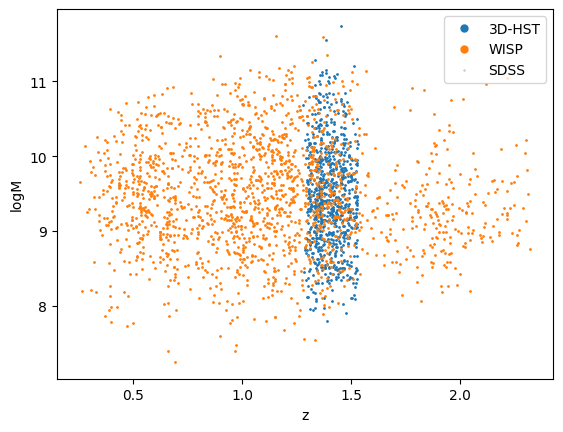

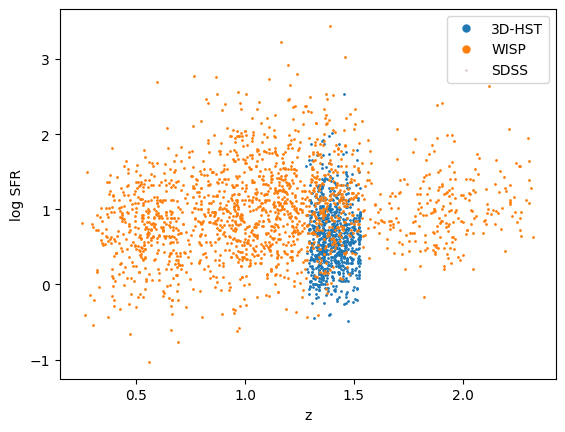

In [424]:
## Redshift comparison between HST and SDSS

z_WISP =  BattistiWISP['z']
z_3DHST = Battisti3DHST['z']
z_SDSS = BattistiSpecProp['z']
mass_WISP =  BattistiWISP['logM']
mass_3DHST = Battisti3DHST['logM']
mass_SDSS = BattistiSpecProp['logM_p50']
SFR_WISP = BattistiWISP['logSFR']
SFR_3DHST = Battisti3DHST['logSFR']
print(z_SDSS[10])
print(mass_SDSS[10])

p1 = plt.plot(z_3DHST, mass_3DHST, '.',markersize=2)
p2 = plt.plot(z_WISP, mass_WISP, '.',markersize=2)
# Issue with SDSS mass vs z, maybe redshifts too small? 
#p3 = plt.plot(z_SDSS, mass_SDSS, '.',markersize=.1) 
plt.xlabel("z")
#plt.xlim([7.5,9.5])
#plt.ylim([-1.0001,-.9999])
plt.ylabel("logM")
#plt.text(7.6,2,"R = (N2+Halpha)/O3")
plt.legend((p1[0], p2[0], p3[0]), ('3D-HST', 'WISP', 'SDSS'),fontsize=10,markerscale=5,loc='upper right')
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

p1 = plt.plot(z_3DHST, SFR_3DHST, '.',markersize=2)
p2 = plt.plot(z_WISP, SFR_WISP, '.',markersize=2)
# Issue with SDSS mass vs z, maybe redshifts too small? 
#p3 = plt.plot(z_SDSS, mass_SDSS, '.',markersize=.1) 
plt.xlabel("z")
#plt.xlim([7.5,9.5])
#plt.ylim([-1.0001,-.9999])
plt.ylabel("log SFR")
#plt.text(7.6,2,"R = (N2+Halpha)/O3")
plt.legend((p1[0], p2[0], p3[0]), ('3D-HST', 'WISP', 'SDSS'),fontsize=10,markerscale=5,loc='upper right')
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()


In [425]:
# Dust correction

# Correcting for dust in each galaxy, based off of F19 model of MW dust extinction 
# See this doc for more information 
# https://docs.google.com/document/d/1DAK7oo5JPau576Z7sWnu0bUdTS8y4rS92MxC76ky0xQ/edit?usp=sharing

# HST data values, uncorrected

# WISP
OIII_WISP = SN_WISP['foiii']
HaNII_WISP = SN_WISP['fhanii']
Hb_WISP = SN_WISP['fhb']
SII_WISP = SN_WISP['fsii']
OII_WISP = SN_WISP['foii']

# 3D HST
OIII_3DHST = SN_3DHST['foiii']
HaNII_3DHST = SN_3DHST['fhanii']
Hb_3DHST = SN_3DHST['fhb']
SII_3DHST = SN_3DHST['fsii']
OII_3DHST = SN_3DHST['foii']

# Observed Ha/Hb ratio
## STUCK HERE, Ha blended
#Ha_Hb_obs = Halpha_Batt / Hbeta_Batt
# Intrinsic Ha/Hb ratio value, given to me by Andrew Battisti
#Ha_Hb_int = 2.86

## SDSS dust correction

# Correcting for dust in each galaxy, based off of F19 model of MW dust extinction 
# See this doc for more information 
# https://docs.google.com/document/d/1DAK7oo5JPau576Z7sWnu0bUdTS8y4rS92MxC76ky0xQ/edit?usp=sharing

# Battisti SDSS data values, uncorrected
OIII5007_Batt = BattistiSpecLine['OIII_5007']
OIII4959_Batt = BattistiSpecLine['OIII_4959']
OIII_Batt = BattistiSpecLine['OIII_5007'] + BattistiSpecLine['OIII_4959']
Hbeta_Batt = BattistiSpecLine['Hb']
NII84_Batt = BattistiSpecLine['NII_6584']
Halpha_Batt = BattistiSpecLine['Ha']
SII17_Batt = BattistiSpecLine['SII_6717']
SII31_Batt = BattistiSpecLine['SII_6731']
SII_Batt = BattistiSpecLine['SII_6717'] + BattistiSpecLine['SII_6731']
OII26_Batt = BattistiSpecLine['OII_3726']
OII29_Batt = BattistiSpecLine['OII_3729']
OII_Batt = BattistiSpecLine['OII_3726'] + BattistiSpecLine['OII_3729']

# Observed Ha/Hb ratio (Balmer decrement)
Ha_Hb_obs_SDSS = Halpha_Batt / Hbeta_Batt
# Intrinsic Ha/Hb ratio value, given to me by Andrew Battisti
Ha_Hb_int = 2.86

int_obs_SDSS = Ha_Hb_int / Ha_Hb_obs_SDSS
#int_obsavg = np.sum(int_obs)/len(int_obs)
#print(int_obsavg)

# k values for each line in question
ext = F19(Rv=3.1)
# units in parentheses are: 1/wavelength(um) units 
# and we will assume Rv=3.1, which is the avg MW value.
k_Hb = ext(1/.48613)*3.1
k_Ha = ext(1/.65628)*3.1
#print(k_Ha) #looks good
#print(k_Hb) #looks good
k_OIII5007 = ext(1/.5007)*3.1
k_OIII4959 = ext(1/.4959)*3.1
k_NII84 = ext(1/.6584)*3.1
k_SII17 = ext(1/.6717)*3.1
k_SII31 = ext(1/.6731)*3.1
k_OII26 = ext(1/.3726)*3.1
k_OII29 = ext(1/.3729)*3.1

## Color correction, E(B-V) = log10 ( (Ha/Hb)obs / (Ha/Hb)int ) / (0.4(k(Hb) - (k(Ha))))
# Is this the balmer decrement?
EB_V_SDSS = np.log10( Ha_Hb_obs_SDSS / Ha_Hb_int ) / (0.4*(k_Hb - k_Ha))
#print(EB_V[44]) # looks good, Andrew says should be less than 0.9

## Intrinsic flux, accounting for attenuation, Fint = Fatt * 10^ (0.4*k(lambda)*EB_V)
#Halpha_Batt_int = (pow(10,0.4*k_Ha*EB_V))*Halpha_Batt #10**(0.4*k_Ha*EB_V))
x = (pow(10,0.4*k_Ha*EB_V_SDSS)) 
Halpha_Batt_int = x*Halpha_Batt
Hbeta_Batt_int = (pow(10,0.4*k_Hb*EB_V_SDSS))*Hbeta_Batt
OIII5007_Batt_int = (pow(10,0.4*k_OIII5007*EB_V_SDSS))*OIII5007_Batt
OIII4959Batt_int = (pow(10,0.4*k_OIII4959*EB_V_SDSS))*OIII4959_Batt
OIII_Batt_int = OIII5007_Batt_int + OIII4959Batt_int
NII84_Batt_int = (pow(10,0.4*k_NII84*EB_V_SDSS))*NII84_Batt
SII17_Batt_int = (pow(10,0.4*k_SII17*EB_V_SDSS))*SII17_Batt
SII31_Batt_int = (pow(10,0.4*k_SII31*EB_V_SDSS))*SII31_Batt
SII_Batt_int = SII17_Batt_int + SII31_Batt_int
OII26_Batt_int = (pow(10,0.4*k_OII26*EB_V_SDSS))*OII26_Batt
OII29_Batt_int = (pow(10,0.4*k_OII29*EB_V_SDSS))*OII29_Batt
OII_Batt_int = OII26_Batt_int + OII29_Batt_int


/home/pheretz/.local/lib/python3.9/site-packages/dust_extinction/helpers.py:30: UserWarning: x has no units, assuming x units are inverse microns
  warnings.warn(


In [426]:
### HST correction methods
# Need to correct for dust in HST data using other methods bc lines for balmer dec are blended

# WISP
OIII_WISP = SN_WISP['foiii']
HaNII_WISP = SN_WISP['fhanii']
Hb_WISP = SN_WISP['fhb']
SII_WISP = SN_WISP['fsii']
OII_WISP = SN_WISP['foii']

# 3D HST
OIII_3DHST = SN_3DHST['foiii']
HaNII_3DHST = SN_3DHST['fhanii']
Hb_3DHST = SN_3DHST['fhb']
SII_3DHST = SN_3DHST['fsii']
OII_3DHST = SN_3DHST['foii']

# Method 1. Use blended line 
# Dominiguez 2013 and Price 2014 found no drastic differences

# WISP Observed Ha/Hb ratio
Ha_Hb_obs_WISP = HaNII_WISP / Hb_WISP
# 3D HST 
Ha_Hb_obs_3DHST = HaNII_3DHST / Hb_3DHST
# Intrinsic Ha/Hb ratio value, given to me by Andrew Battisti
Ha_Hb_int = 2.86

## HST dust correction

# Correcting for dust in each galaxy, based off of F19 model of MW dust extinction 
# See this doc for more information 
# https://docs.google.com/document/d/1DAK7oo5JPau576Z7sWnu0bUdTS8y4rS92MxC76ky0xQ/edit?usp=sharing

# Why did I do this?
int_obs_WISP = Ha_Hb_int / Ha_Hb_obs_WISP
int_obs_3DHST = Ha_Hb_int / Ha_Hb_obs_3DHST

# k values for each line in question
ext = F19(Rv=3.1)
# units in parentheses are: 1/wavelength(um) units 
# and we will assume Rv=3.1, which is the avg MW value.
k_Hb = ext(1/.48613)*3.1
## Should I take average?? 
k_Ha = ext(1/.65628)*3.1
k_NII84 = ext(1/.6584)*3.1
k_NIIHa = ext(1/.6573)*3.1

k_OIII5007 = ext(1/.5007)*3.1
k_OIII4959 = ext(1/.4959)*3.1
k_NII84 = ext(1/.6584)*3.1
k_SII17 = ext(1/.6717)*3.1
k_SII31 = ext(1/.6731)*3.1
k_OII26 = ext(1/.3726)*3.1
k_OII29 = ext(1/.3729)*3.1

## Color correction, E(B-V) = log10 ( (Ha/Hb)obs / (Ha/Hb)int ) / (0.4(k(Hb) - (k(Ha))))
# Is this the balmer decrement?
EB_V_WISP = np.log10( Ha_Hb_obs_WISP / Ha_Hb_int ) / (0.4*(k_Hb - k_Ha))
EB_V_3DHST = np.log10( Ha_Hb_obs_3DHST / Ha_Hb_int ) / (0.4*(k_Hb - k_Ha))
#print(EB_V[44]) # looks good, Andrew says should be less than 0.9

## Intrinsic flux, accounting for attenuation, Fint = Fatt * 10^ (0.4*k(lambda)*EB_V)
#Halpha_Batt_int = (pow(10,0.4*k_Ha*EB_V))*Halpha_Batt #10**(0.4*k_Ha*EB_V))

# WISP
OIII_WISP_int_blend = (pow(10,0.4*k_OIII5007*EB_V_WISP))*OIII_WISP
HaNII_WISP_int_blend = (pow(10,0.4*k_NIIHa*EB_V_WISP))*HaNII_WISP
Hb_WISP_int_blend = (pow(10,0.4*k_Hb*EB_V_WISP))*Hb_WISP
## Will do these ones later
#SII_WISP_int = (pow(10,0.4*k_Hb*EB_V_WISP))*SII_WISP
#OII_WISP_int = SN_WISP['foii']

# 3DHST
OIII_3DHST_int_blend = (pow(10,0.4*k_OIII5007*EB_V_3DHST))*OIII_3DHST
HaNII_3DHST_int_blend = (pow(10,0.4*k_NIIHa*EB_V_3DHST))*HaNII_3DHST
Hb_3DHST_int_blend = (pow(10,0.4*k_Hb*EB_V_3DHST))*Hb_3DHST
#SII_3DHST_int = SN_3DHST['fsii']
#OII_3DHST_int = SN_3DHST['foii']

## Method 2. Rely on Balmer dec vs. mass relationship 


/home/pheretz/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


/tmp/ipykernel_1697784/66194007.py:11: RuntimeWarning: divide by zero encountered in divide
  y = (np.log10(NII84_Batt_int/ SII_Batt_int)) + (0.264*np.log(NII84_Batt_int/Halpha_Batt_int))
/tmp/ipykernel_1697784/66194007.py:11: RuntimeWarning: invalid value encountered in log10
  y = (np.log10(NII84_Batt_int/ SII_Batt_int)) + (0.264*np.log(NII84_Batt_int/Halpha_Batt_int))
/tmp/ipykernel_1697784/66194007.py:14: RuntimeWarning: divide by zero encountered in divide
  y1 = (np.log10(NII84_Batt/ SII_Batt)) + (0.264*np.log(NII84_Batt/Halpha_Batt))
/tmp/ipykernel_1697784/66194007.py:14: RuntimeWarning: invalid value encountered in log10
  y1 = (np.log10(NII84_Batt/ SII_Batt)) + (0.264*np.log(NII84_Batt/Halpha_Batt))


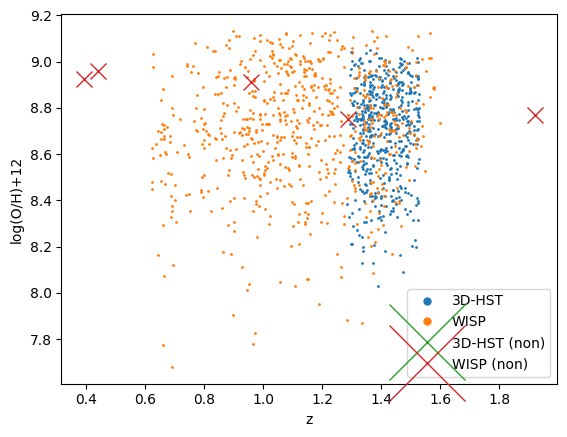

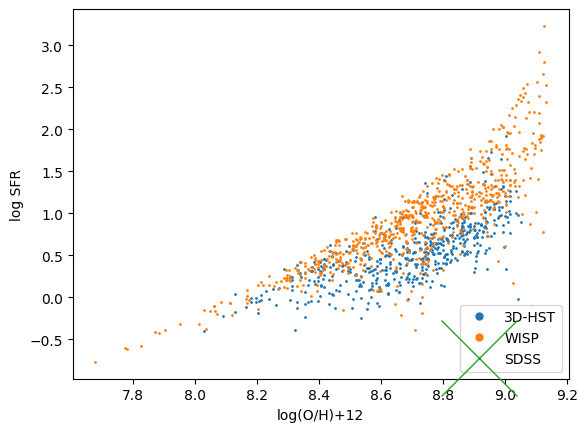

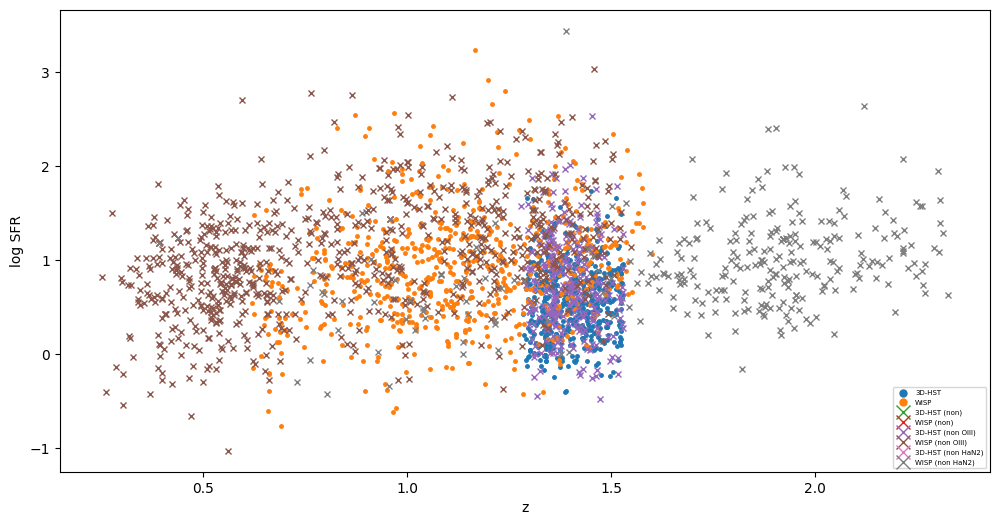

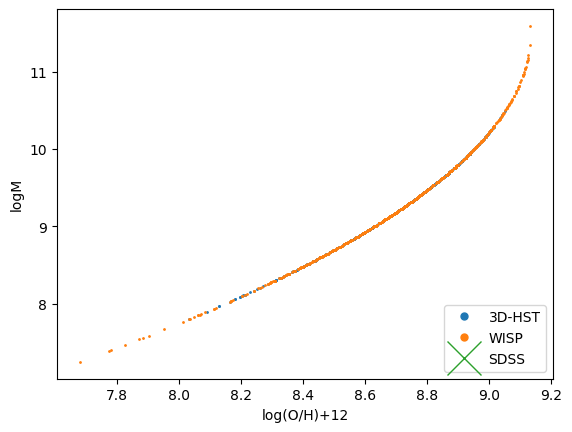

In [427]:
# Metallicity calculations

## Dopita 16 Metallicity calculation 
## STUCK HERE, can't calculate with HST data

# log(O/H) +12 = 8.77 + y + 0.45(y+0.3)^5
# y = log(N2)/S2 + 0.264log(N2)/Ha

# SDSS
# corrected
y = (np.log10(NII84_Batt_int/ SII_Batt_int)) + (0.264*np.log(NII84_Batt_int/Halpha_Batt_int))
logOH_Dop16 =  8.77 + y + 0.45*((y+0.3)**5)
# uncorrected
y1 = (np.log10(NII84_Batt/ SII_Batt)) + (0.264*np.log(NII84_Batt/Halpha_Batt))
logOH_Dop16_unc =  8.77 + y1 + 0.45*((y1+0.3)**5)

## Tremonti 2004 Metallicity Calculation
# uses mass, independent of dust correction
#log(O/H) +12 = -1.492 + 1.847(logM*) − 0.0802626(logM*)^2

# SDSS
logM_SDSS = BattistiSpecProp['logM_p50']
logOH_Tre04_SDSS = -1.492 + 1.847*(logM_SDSS) - 0.0802626*((logM_SDSS)**2)
logOH_p50_Batt = BattistiSpecProp['logOH_p50']

# SN > 3
logM_3DHST = SN_3DHST['logM']
logM_WISP = SN_WISP['logM']
# non detections
#logM_non_3DHST = Nondet_3DHST['logM']
#logM_non_3DHST = Nondet_3DHST['logM']
logM_non_3DHST = Nondet_3DHST['logM']
logM_non_WISP = Nondet_WISP['logM']

# SN > 3
logOH_Tre04_3DHST = -1.492 + 1.847*(logM_3DHST) - 0.0802626*((logM_3DHST)**2)
logOH_Tre04_WISP = -1.492 + 1.847*(logM_WISP) - 0.0802626*((logM_WISP)**2)
# non detections
logOH_Tre04_non_3DHST = -1.492 + 1.847*(logM_non_3DHST) - 0.0802626*((logM_non_3DHST)**2)
logOH_Tre04_non_WISP = -1.492 + 1.847*(logM_non_WISP) - 0.0802626*((logM_non_WISP)**2)


# variables from SN filtered data set
z_SN_WISP =  SN_WISP['z']
z_SN_3DHST = SN_3DHST['z']
z_non_WISP =  Nondet_WISP['z']
z_non_3DHST =  Nondet_3DHST['z']
z_nonO3_WISP =  NondetOIII_WISP['z']
z_nonO3_3DHST =  NondetOIII_3DHST['z']
z_nonHaN2_WISP =  NondetHaNII_WISP['z']
z_nonHaN2_3DHST =  NondetHaNII_3DHST['z']
mass_SN_WISP =  SN_WISP['logM']
mass_SN_3DHST = SN_3DHST['logM']
mass_non_WISP =  Nondet_WISP['logM']
mass_non_3DHST = Nondet_3DHST['logM']
mass_nonO3_WISP =  NondetOIII_WISP['logM']
mass_nonO3_3DHST = NondetOIII_3DHST['logM']
mass_nonHaN2_WISP =  NondetHaNII_WISP['logM']
mass_nonHaN2_3DHST = NondetHaNII_3DHST['logM']
SFR_SN_WISP = SN_WISP['logSFR']
SFR_SN_3DHST = SN_3DHST['logSFR']
SFR_non_WISP = Nondet_WISP['logSFR']
SFR_non_3DHST = Nondet_3DHST['logSFR']
SFR_nonO3_WISP = NondetOIII_WISP['logSFR']
SFR_nonO3_3DHST = NondetOIII_3DHST['logSFR']
SFR_nonHaN2_WISP = NondetHaNII_WISP['logSFR']
SFR_nonHaN2_3DHST = NondetHaNII_3DHST['logSFR']

## exploring plots from K&K 2004
# https://arxiv.org/pdf/astro-ph/0408128.pdf

p1 = plt.plot(z_SN_3DHST, logOH_Tre04_3DHST, '.',markersize=2)
p2 = plt.plot(z_SN_WISP, logOH_Tre04_WISP , '.',markersize=2)
p3 = plt.plot(z_non_3DHST, logOH_Tre04_non_3DHST, 'x',markersize=11)
p4 = plt.plot(z_non_WISP, logOH_Tre04_non_WISP , 'x',markersize=11)
#p3 = plt.plot(z_SDSS, logOH_Tre04_SDSS , '.',markersize=.1)
# Issue with SDSS mass vs z, maybe redshifts too small? Could be different units
#p3 = plt.plot(z_SDSS, mass_SDSS, '.',markersize=.1) 
plt.xlabel("z")
#plt.xlim([7.5,9.5])
#plt.ylim([-1.0001,-.9999])
plt.ylabel("log(O/H)+12")
#plt.text(7.6,2,"R = (N2+Halpha)/O3")
plt.legend((p1[0], p2[0], p3[0],p4[0]), ('3D-HST', 'WISP', '3D-HST (non)', 'WISP (non)'),fontsize=10,markerscale=5,loc='lower right')
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

## Interesting to see that SN removes all galaxies beyond z~1.6

p1 = plt.plot(logOH_Tre04_3DHST, SFR_SN_3DHST,'.',markersize=2)
p2 = plt.plot(logOH_Tre04_WISP , SFR_SN_WISP,'.',markersize=2)
#p3 = plt.plot(z_SDSS, logOH_Tre04_SDSS , '.',markersize=.1)
# Issue with SDSS mass vs z, maybe redshifts too small? Could be different units
#p3 = plt.plot(z_SDSS, mass_SDSS, '.',markersize=.1) 
plt.xlabel("log(O/H)+12")
#plt.xlim([7.5,9.5])
#plt.ylim([-1.0001,-.9999])
plt.ylabel("log SFR")
#plt.text(7.6,2,"R = (N2+Halpha)/O3")
plt.legend((p1[0], p2[0], p3[0],p4[0]), ('3D-HST', 'WISP', 'SDSS'),fontsize=10,markerscale=5,loc='lower right')
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

# does this trend between SFR and metall make sense? 

plt.figure(figsize=(12, 6))
p1 = plt.plot(z_SN_3DHST, SFR_SN_3DHST,'.',markersize=5)
p2 = plt.plot(z_SN_WISP , SFR_SN_WISP,'.',markersize=5)
p3 = plt.plot(z_non_3DHST, SFR_non_3DHST, 'x',markersize=5)
p4 = plt.plot(z_non_WISP, SFR_non_WISP , 'x',markersize=5)
p5 = plt.plot(z_nonO3_3DHST, SFR_nonO3_3DHST, 'x',markersize=5)
p6 = plt.plot(z_nonO3_WISP, SFR_nonO3_WISP , 'x',markersize=5)
p7 = plt.plot(z_nonHaN2_3DHST, SFR_nonHaN2_3DHST, 'x',markersize=5)
p8 = plt.plot(z_nonHaN2_WISP, SFR_nonHaN2_WISP , 'x',markersize=5)
#p3 = plt.plot(z_SDSS, logOH_Tre04_SDSS , '.',markersize=.1)
# Issue with SDSS mass vs z, maybe redshifts too small? Could be different units
#p3 = plt.plot(z_SDSS, mass_SDSS, '.',markersize=.1) 
plt.xlabel("z")
#plt.xlim([7.5,9.5])
#plt.ylim([-1.0001,-.9999])
plt.ylabel("log SFR")
#plt.text(7.6,2,"R = (N2+Halpha)/O3")
plt.legend((p1[0], p2[0], p3[0],p4[0], p5[0], p6[0], p7[0], p8[0]), ('3D-HST', 'WISP', '3D-HST (non)', 'WISP (non)','3D-HST (non OIII)', 'WISP (non OIII)','3D-HST (non HaN2)', 'WISP (non HaN2)')
           ,fontsize=5,markerscale=2,loc='lower right')
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

p1 = plt.plot(logOH_Tre04_3DHST, mass_SN_3DHST,'.',markersize=2)
p2 = plt.plot(logOH_Tre04_WISP , mass_SN_WISP,'.',markersize=2)
#p3 = plt.plot(z_SDSS, logOH_Tre04_SDSS , '.',markersize=.1)
# Issue with SDSS mass vs z, maybe redshifts too small? Could be different units
#p3 = plt.plot(z_SDSS, mass_SDSS, '.',markersize=.1) 
plt.xlabel("log(O/H)+12")
#plt.xlim([7.5,9.5])
#plt.ylim([-1.0001,-.9999])
plt.ylabel("logM")
#plt.text(7.6,2,"R = (N2+Halpha)/O3")
plt.legend((p1[0], p2[0], p3[0]), ('3D-HST', 'WISP', 'SDSS'),fontsize=10,markerscale=5,loc='lower right')
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

# so tight because metallicity calc is based on mass 

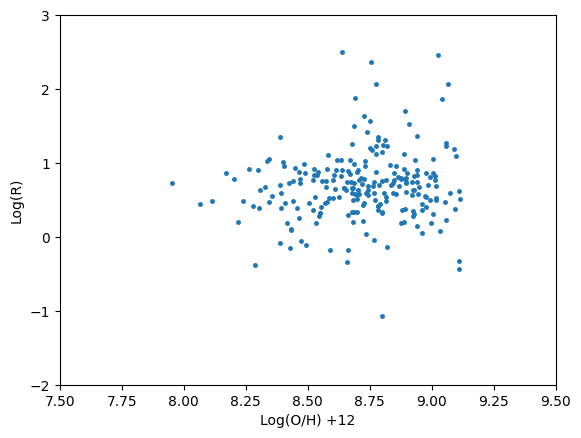

In [428]:
## Check with known diagnostics
## Can't! NII and Ha already blended
## can with R23

### NO OII in 3D HST data

## R23 R =[OII]λ3727,9+[OIII]λ4959,5007/Hβ) 

## some OII missing from WISP, I assume due to redshift, filter out galaxies w no OII detections
WISP_w_OII = SN_WISP.loc[SN_WISP['foii'] > 0]
OII_WISP_w_OII = WISP_w_OII['foii']
OIII_WISP_w_OII = WISP_w_OII['foiii']
Hb_WISP_w_OII = WISP_w_OII['fhb']
logM_WISP_w_OII = WISP_w_OII['logM']
logOH_Tre04_WISP_w_OII = -1.492 + 1.847*(logM_WISP_w_OII) - 0.0802626*((logM_WISP_w_OII)**2)
## Assign WISP redshift ranges
#z0_05_WISP_w_OII = WISP_w_OII.loc[0<'z'<=0.5]
#z05_1_WISP_w_OII = WISP_w_OII.loc[0.5<'z'<=1]
#z1_15_WISP_w_OII = WISP_w_OII.loc[1<'z'<=1.5]
#z15_2_WISP_w_OII = WISP_w_OII.loc[1.5<'z'<=2]
#z2_25_WISP_w_OII = WISP_w_OII.loc[2<'z']

## R23 R =[OII]λ3727,9+[OIII]λ4959,5007/Hβ) ## WISP
# WISP not dust corrected
R23_WISP = np.log10((OII_WISP_w_OII + OII_WISP_w_OII)/Hb_WISP_w_OII)
# SDSS dust corrected
R23_SDSS = np.log10((OII_Batt_int + OIII_Batt_int)/Hbeta_Batt_int)

plt.plot(logOH_Tre04_WISP_w_OII, R23_WISP, '.',markersize=5)
#plt.plot(logOH_Tre04_SDSS, R23_SDSS, '.',markersize=.1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-2,3])
plt.ylabel("Log(R)")
#plt.text(7.6,1.5,"R = R23")
#plt.text(7.6,1.25,"WISP HST data",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

# interesting scatter in SDSS data. Dust corrected. What is? 
# In my previous plots as well 
# ionization? 
# is high HST scatter due to redshift? 


In [429]:
## Assign 3DHST redshift ranges
z0_05_3DHST = SN_3DHST.loc[0<SN_3DHST['z']<=0.5]
z05_1_3DHST = SN_3DHST.loc[0.5<SN_3DHST['z']<=1]
z1_15_3DHST = SN_3DHST.loc[1<SN_3DHST['z']<=1.5]
z15_2_3DHST = SN_3DHST.loc[1.5<SN_3DHST['z']<=2]
z2_25_3DHST = SN_3DHST.loc[2<SN_3DHST['z']]
## Assign WISP redshift ranges
z0_05_WISP = SN_WISP.loc[0<SN_WISP['z']<=0.5]
z05_1_WISP = SN_WISP.loc[0.5<SN_WISP['z']<=1]
z1_15_WISP = SN_WISP.loc[1<SN_WISP['z']<=1.5]
z15_2_WISP = SN_WISP.loc[1.5<SN_WISP['z']<=2]
z2_25_WISP = SN_WISP.loc[2<SN_WISP['z']]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

/home/pheretz/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/pheretz/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


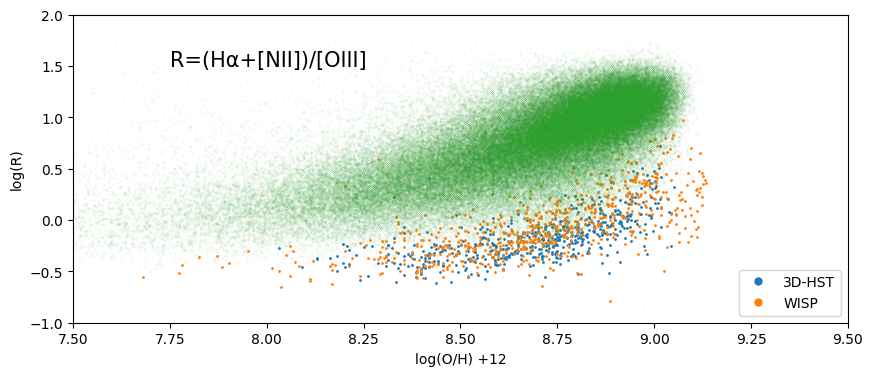

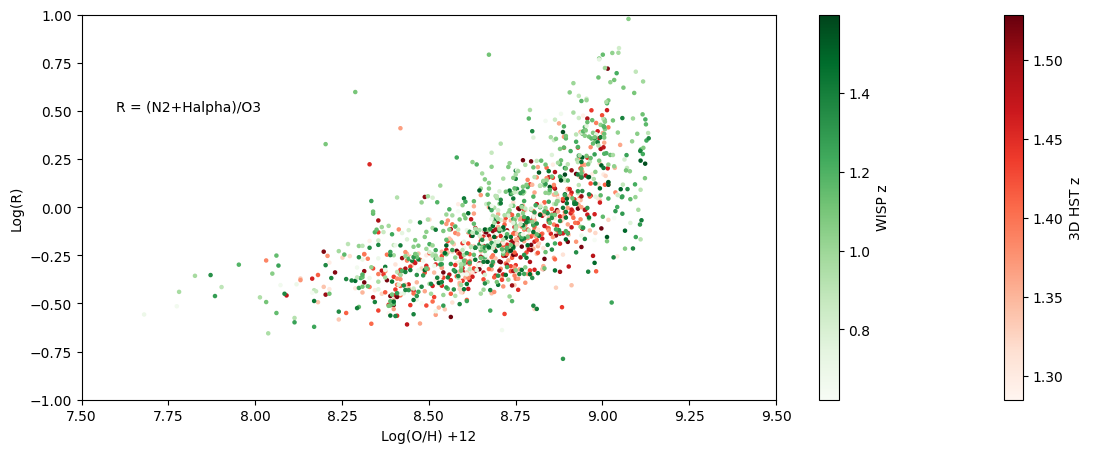

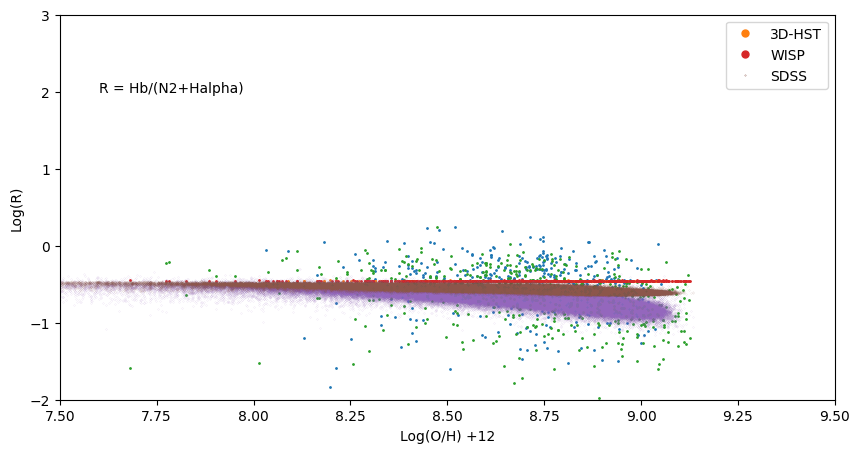

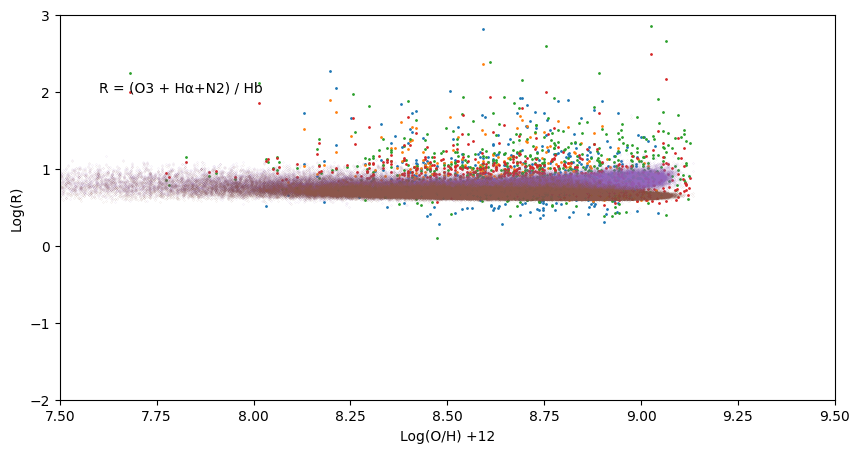

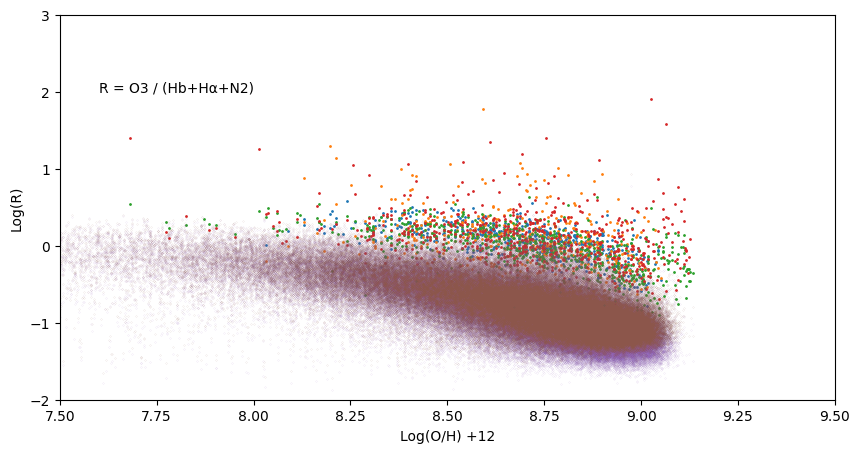

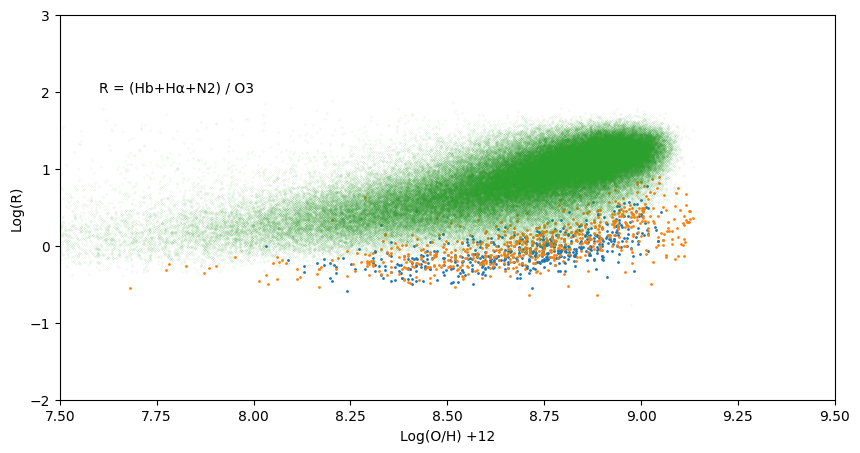

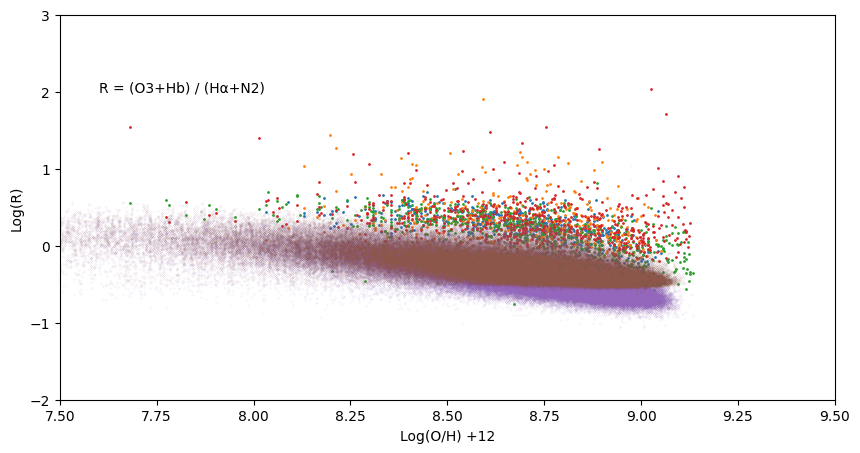

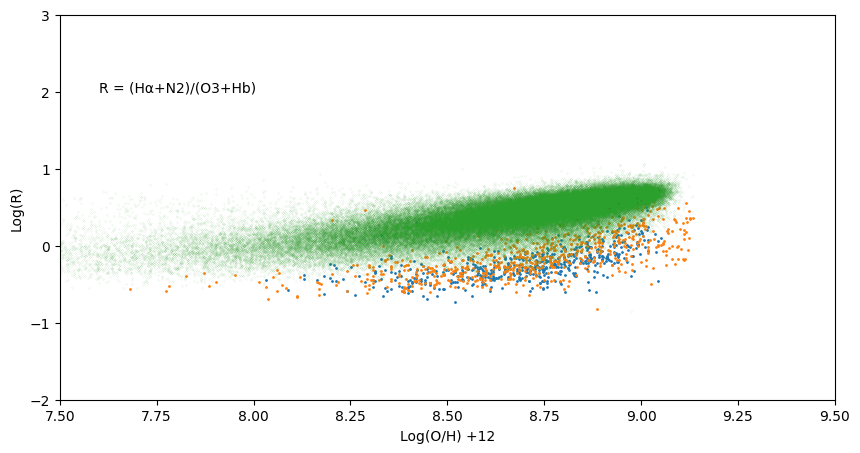

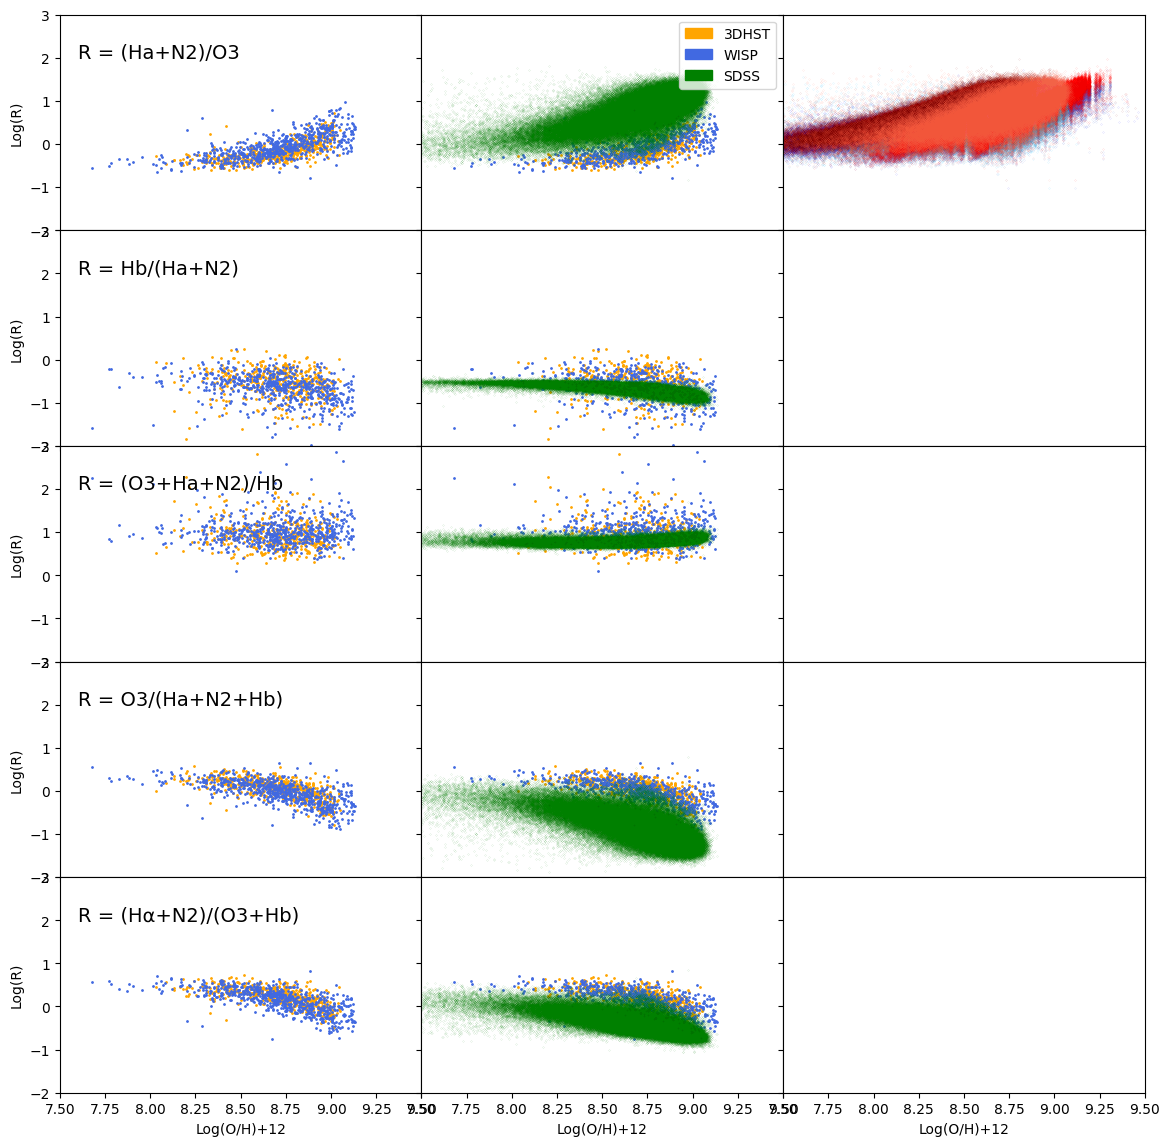

In [437]:
## New relations, low resolution

# 3D HST
# High S/N
OIII_3DHST = SN_3DHST['foiii']
HaNII_3DHST = SN_3DHST['fhanii']
Hb_3DHST = SN_3DHST['fhb']
# Dust corrected, with Ha+NII blended line
OIII_3DHST_int_blend = (pow(10,0.4*k_OIII5007*EB_V_3DHST))*OIII_3DHST
HaNII_3DHST_int_blend = (pow(10,0.4*k_NIIHa*EB_V_3DHST))*HaNII_3DHST
Hb_3DHST_int_blend = (pow(10,0.4*k_Hb*EB_V_3DHST))*Hb_3DHST

# WISP
# High S/N
OIII_WISP = SN_WISP['foiii']
HaNII_WISP = SN_WISP['fhanii']
Hb_WISP = SN_WISP['fhb']
# Dust corrected, with Ha+NII blended line
OIII_WISP_int_blend = (pow(10,0.4*k_OIII5007*EB_V_WISP))*OIII_WISP
HaNII_WISP_int_blend = (pow(10,0.4*k_NIIHa*EB_V_WISP))*HaNII_WISP
Hb_WISP_int_blend = (pow(10,0.4*k_Hb*EB_V_WISP))*Hb_WISP

# z
z_WISP = SN_WISP['z']
z_3DHST = SN_3DHST['z']
z_SDSS = BattistiSpecLine['z']

# 3D-HST low res new ratios
O3_HaN2_3DHST = np.log10( OIII_3DHST / HaNII_3DHST )
HaN2_O3_3DHST = np.log10( HaNII_3DHST / OIII_3DHST)
Hb_HaN2_3DHST = np.log10( Hb_3DHST / (HaNII_3DHST) )
OIIIHaN2_Hb_3DHST = np.log10((OIII_3DHST+HaNII_3DHST)/Hb_3DHST )
OIII_HbHaN2_3DHST = np.log10(OIII_3DHST/(Hb_3DHST+HaNII_3DHST) )
HbHaN2_OIII_3DHST = np.log10((Hb_3DHST+HaNII_3DHST) / OIII_3DHST )
OIIIHb_HaN2_3DHST = np.log10((Hb_3DHST+OIII_3DHST)/(HaNII_3DHST) )
HaN2_OIIIHb_3DHST = np.log10((HaNII_3DHST)/(Hb_3DHST+OIII_3DHST) )
# Corrected 3D HST, blended line
O3_HaN2_3DHST_blend = np.log10( OIII_3DHST_int_blend / HaNII_3DHST_int_blend )
HaN2_O3_3DHST_blend = np.log10( HaNII_3DHST_int_blend / OIII_3DHST_int_blend)
Hb_HaN2_3DHST_blend = np.log10( Hb_3DHST_int_blend / (HaNII_3DHST_int_blend) )
OIIIHaN2_Hb_3DHST_blend = np.log10((OIII_3DHST_int_blend+HaNII_3DHST_int_blend)/Hb_3DHST_int_blend )
OIII_HbHaN2_3DHST_blend = np.log10(OIII_3DHST_int_blend/(Hb_3DHST_int_blend+HaNII_3DHST_int_blend) )
HbHaN2_OIII_3DHST_blend = np.log10((Hb_3DHST_int_blend+HaNII_3DHST_int_blend) / OIII_3DHST_int_blend )
OIIIHb_HaN2_3DHST_blend = np.log10((Hb_3DHST_int_blend+OIII_3DHST_int_blend)/(HaNII_3DHST_int_blend) )
HaN2_OIIIHb_3DHST_blend = np.log10((HaNII_3DHST_int_blend)/(Hb_3DHST_int_blend+OIII_3DHST_int_blend) )

# WISP low res new ratios
O3_HaN2_WISP = np.log10( OIII_WISP / HaNII_WISP )
HaN2_O3_WISP = np.log10( HaNII_WISP / OIII_WISP)
Hb_HaN2_WISP = np.log10( Hb_WISP / (HaNII_WISP) )
OIIIHaN2_Hb_WISP = np.log10((OIII_WISP+HaNII_WISP)/Hb_WISP )
OIII_HbHaN2_WISP = np.log10(OIII_WISP/(Hb_WISP+HaNII_WISP) )
HbHaN2_OIII_WISP = np.log10((Hb_WISP+HaNII_WISP) / OIII_WISP )
OIIIHb_HaN2_WISP= np.log10((Hb_WISP+OIII_WISP)/(HaNII_WISP) )
HaN2_OIIIHb_WISP = np.log10((HaNII_WISP)/(Hb_WISP+OIII_WISP) )
# Corrected WISP, blended line
O3_HaN2_WISP_blend = np.log10( OIII_WISP_int_blend / HaNII_WISP_int_blend )
HaN2_O3_WISP_blend = np.log10( HaNII_WISP_int_blend / OIII_WISP_int_blend)
Hb_HaN2_WISP_blend = np.log10( Hb_WISP_int_blend / (HaNII_WISP_int_blend) )
OIIIHaN2_Hb_WISP_blend = np.log10((OIII_WISP_int_blend+HaNII_WISP_int_blend)/Hb_WISP_int_blend )
OIII_HbHaN2_WISP_blend = np.log10(OIII_WISP_int_blend/(Hb_WISP_int_blend+HaNII_WISP_int_blend) )
HbHaN2_OIII_WISP_blend = np.log10((Hb_WISP_int_blend+HaNII_WISP_int_blend) / OIII_WISP_int_blend )
OIIIHb_HaN2_WISP_blend = np.log10((Hb_WISP_int_blend+OIII_WISP_int_blend)/(HaNII_WISP_int_blend) )
HaN2_OIIIHb_WISP_blend = np.log10((HaNII_WISP_int_blend)/(Hb_WISP_int_blend+OIII_WISP_int_blend) )

# Battisti SDSS variables, corrected
O3_HaN2_Batt_int = np.log10( OIII_Batt_int / (NII84_Batt_int+Halpha_Batt_int) )
HaN2_O3_Batt_int = np.log10( (NII84_Batt_int+Halpha_Batt_int) / OIII_Batt_int)
Hb_HaN2_Batt_int = np.log10( Hbeta_Batt_int / (NII84_Batt_int+Halpha_Batt_int) )
OIIIHaN2_Hb_Batt_int = np.log10((OIII_Batt_int+NII84_Batt_int+Halpha_Batt_int)/Hbeta_Batt_int )
OIII_HbHaN2_Batt_int = np.log10(OIII_Batt_int/(Hbeta_Batt_int+NII84_Batt_int+Halpha_Batt_int) )
HbHaN2_OIII_Batt_int = np.log10((Hbeta_Batt_int+NII84_Batt_int+Halpha_Batt_int) / OIII_Batt_int )
OIIIHb_HaN2_Batt_int = np.log10((Hbeta_Batt_int+OIII_Batt_int)/(NII84_Batt_int+Halpha_Batt_int) )
HaN2_OIIIHb_Batt_int = np.log10((NII84_Batt_int+Halpha_Batt_int)/(Hbeta_Batt_int+OIII_Batt_int) )

# Battisti variables, uncorrected
O3_HaN2_Batt = np.log10( OIII_Batt / (NII84_Batt+Halpha_Batt) )
HaN2_O3_Batt = np.log10( (NII84_Batt+Halpha_Batt) / OIII_Batt)
Hb_HaN2_Batt = np.log10( Hbeta_Batt / (NII84_Batt+Halpha_Batt) )
HaN2_Hb_Batt = np.log10( (NII84_Batt+Halpha_Batt)/Hbeta_Batt )
OIIIHaN2_Hb_Batt = np.log10((OIII_Batt+NII84_Batt+Halpha_Batt)/Hbeta_Batt )
OIII_HbHaN2_Batt = np.log10(OIII_Batt/(Hbeta_Batt+NII84_Batt+Halpha_Batt) )
HbHaN2_OIII_Batt = np.log10((Hbeta_Batt+NII84_Batt+Halpha_Batt) / OIII_Batt )
OIIIHb_HaN2_Batt = np.log10((Hbeta_Batt+OIII_Batt)/(NII84_Batt+Halpha_Batt) )
HaN2_OIIIHb_Batt = np.log10((NII84_Batt+Halpha_Batt)/(Hbeta_Batt+OIII_Batt) )

## Metallicity
x3D = logOH_Tre04_3DHST
xWISP = logOH_Tre04_WISP 
xSDSS = logOH_Tre04_SDSS
xSDSS2 = logOH_p50_Batt
xSDSS_dop_unc = logOH_Dop16_unc
xSDSS_dop_int = logOH_Dop16

## (N2+Halpha)/O3

#fit1b = np.polyfit(x, y1b, 3)
#print(fit1b)
#p1b = np.poly1d(fit1b)
#t1b = np.linspace(8.1, 9.2, 5000)
fig = plt.figure(figsize=(10, 4))
p1 = plt.plot(x3D, HaN2_O3_3DHST, '.',markersize=2)#, t1b, p1b(t1b), '-',markersize=.1)
#p1 = plt.plot(x3D, HaN2_O3_3DHST_blend, '.',markersize=2)
p2 = plt.plot(xWISP, HaN2_O3_WISP,'.',markersize=2)
#p2 = plt.plot(xWISP, HaN2_O3_WISP_blend, '.',markersize=2)
p3 = plt.plot(logOH_Tre04_SDSS, HaN2_O3_Batt, '.',markersize=.1)
#p4 = plt.plot(xSDSS, HaN2_O3_Batt_int, '.',markersize=.1)
#p4 = plt.plot(xSDSS_dop_unc, HaN2_O3_Batt, '.',markersize=.1)
#p4 = plt.plot(xSDSS_dop_int, HaN2_O3_Batt_int, '.',markersize=.1)
plt.xlabel("log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-1,2])
plt.ylabel("log(R)")
plt.text(7.75,1.5,'R=(H\u03B1+[NII])/[OIII]',fontsize=15)
#plt.text(7.6,1.25,"3D-HST & WISP",size=5)
plt.legend((p1[0], p2[0]), ('3D-HST', 'WISP', 'SDSS (Tre)'),fontsize=10,markerscale=5,loc='lower right')
plt.savefig("HaN2_O3.HSTcompare.pdf",format="pdf")
plt.show()

# show redshift 
fig = plt.figure(figsize=(14, 5))
p1 = plt.scatter(x3D, HaN2_O3_3DHST,c=z_3DHST,cmap='Reds',s=5)
#p1 = plt.scatter(x3D, HaN2_O3_3DHST_blend,c=z_3DHST,cmap='Greens',s=5)
plt.colorbar(label='3D HST z')
p2 = plt.scatter(xWISP, HaN2_O3_WISP,c=z_WISP,cmap='Greens',s=5)
#p2 = plt.scatter(xWISP, HaN2_O3_WISP_blend,c=z_WISP,cmap='Reds',s=5)
plt.colorbar(label='WISP z')
#p3 = plt.scatter(xSDSS, HaN2_O3_Batt,c=z_SDSS,s=.1)
#plt.colorbar(label='SDSS z')
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-1,1])
plt.ylabel("Log(R)")
plt.text(7.6,0.5,"R = (N2+Halpha)/O3")
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

## Hb / Ha+NII vs metallicity

#fit2 = np.polyfit(x, y2, 3)
#print(fit2)
#p2 = np.poly1d(fit2)
#t2 = np.linspace(8.1, 9.2, 5000)
fig = plt.figure(figsize=(10, 5))
p1 = plt.plot(x3D, Hb_HaN2_3DHST, '.',markersize=2)# t2, p2(t2), '-',markersize=.1)
p1 = plt.plot(x3D, Hb_HaN2_3DHST_blend, '.',markersize=2)
p2 = plt.plot(xWISP, Hb_HaN2_WISP, '.',markersize=2)
p2 = plt.plot(xWISP, Hb_HaN2_WISP_blend, '.',markersize=2)
p3 = plt.plot(xSDSS, Hb_HaN2_Batt, '.',markersize=.1)
p3 = plt.plot(xSDSS, Hb_HaN2_Batt_int, '.',markersize=.1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-2,3])
plt.ylabel("Log(R)")
plt.text(7.6,2,"R = Hb/(N2+Halpha)")
#plt.text(7.6,-1.25,"3D-HST & WISP",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.legend((p1[0], p2[0], p3[0]), ('3D-HST', 'WISP', 'SDSS'),fontsize=10,markerscale=5,loc='upper right')
plt.show()


## OIII + H⍺+NII / H𝛽  vs. metallicity

#fit3 = np.polyfit(x, y3, 3)
#print(fit3)
#p3 = np.poly1d(fit3)
#t3= np.linspace(8.1, 9.2, 5000)
fig = plt.figure(figsize=(10, 5))
plt.plot(x3D, OIIIHaN2_Hb_3DHST, '.',markersize=2)# t3, p3(t3), '-',markersize=.1)
plt.plot(x3D, OIIIHaN2_Hb_3DHST_blend, '.',markersize=2)
plt.plot(xWISP, OIIIHaN2_Hb_WISP, '.',markersize=2)
plt.plot(xWISP, OIIIHaN2_Hb_WISP_blend, '.',markersize=2)
plt.plot(xSDSS, OIIIHaN2_Hb_Batt, '.',markersize=.1)
plt.plot(xSDSS, OIIIHaN2_Hb_Batt_int, '.',markersize=.1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-2,3])
plt.ylabel("Log(R)")
plt.text(7.6,2,"R = (O3 + H⍺+N2) / Hb")
#plt.text(7.6,1,"3D-HST & WISP",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

## OIII / H𝛽 + H⍺+NII

#fit4 = np.polyfit(x, y4, 3)
#print(fit4)
#p4 = np.poly1d(fit4)
#t4= np.linspace(8.1, 9.2, 5000)
fig = plt.figure(figsize=(10, 5))
plt.plot(x3D, OIII_HbHaN2_3DHST, '.',markersize=2)# t4, p4(t4), '-',markersize=.1)
plt.plot(x3D, OIII_HbHaN2_3DHST_blend, '.',markersize=2)
plt.plot(xWISP, OIII_HbHaN2_WISP, '.',markersize=2)
plt.plot(xWISP, OIII_HbHaN2_WISP_blend, '.',markersize=2)
plt.plot(xSDSS, OIII_HbHaN2_Batt, '.',markersize=.1)
plt.plot(xSDSS, OIII_HbHaN2_Batt_int, '.',markersize=.1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-2,3])
plt.ylabel("Log(R)")
plt.text(7.6,2,"R = O3 / (Hb+H⍺+N2)")
#plt.text(7.6,-1.2,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

## H𝛽 + H⍺+NII / OIII 

#fit4b = np.polyfit(x, y4b, 3)
#print(fit4b)
#p4b = np.poly1d(fit4b)
#t4b= np.linspace(8.1, 9.2, 5000)
fig = plt.figure(figsize=(10, 5))
plt.plot(x3D, HbHaN2_OIII_3DHST, '.',markersize=2)# t4b, p4b(t4b), '-',markersize=.1)
plt.plot(xWISP, HbHaN2_OIII_WISP, '.',markersize=2)
plt.plot(xSDSS, HbHaN2_OIII_Batt, '.',markersize=.1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-2,3])
plt.ylabel("Log(R)")
plt.text(7.6,2,"R = (Hb+H⍺+N2) / O3")
#plt.text(7.6,0.8,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

## H⍺+NII / OIII+H𝛽 

#fit5 = np.polyfit(x, y5, 3)
#print(fit5)
#p5 = np.poly1d(fit5)
#t5= np.linspace(8.1, 9.2, 5000)
fig = plt.figure(figsize=(10, 5))
plt.plot(x3D, OIIIHb_HaN2_3DHST, '.',markersize=2)# t5, p5(t5), '-',markersize=.1)
plt.plot(x3D, OIIIHb_HaN2_3DHST_blend, '.',markersize=2)
plt.plot(xWISP, OIIIHb_HaN2_WISP, '.',markersize=2)
plt.plot(xWISP, OIIIHb_HaN2_WISP_blend, '.',markersize=2)
plt.plot(xSDSS, OIIIHb_HaN2_Batt, '.',markersize=.1)
plt.plot(xSDSS, OIIIHb_HaN2_Batt_int, '.',markersize=.1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-2,3])
plt.ylabel("Log(R)")
plt.text(7.6,2,"R = (O3+Hb) / (H⍺+N2)")
#plt.text(7.6,-0.7,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

## OIII+H𝛽 / H⍺+NII

#fit5b = np.polyfit(x, y5b, 3)
#print(fit5b)
#p5b = np.poly1d(fit5b)
#t5b= np.linspace(8.1, 9.2, 5000)
fig = plt.figure(figsize=(10, 5))
plt.plot(x3D, HaN2_OIIIHb_3DHST, '.',markersize=2)# t5b, p5b(t5b), '-',markersize=.1)
plt.plot(xWISP, HaN2_OIIIHb_WISP, '.',markersize=2)
plt.plot(xSDSS, HaN2_OIIIHb_Batt, '.',markersize=.1)
plt.xlabel("Log(O/H) +12")
plt.xlim([7.5,9.5])
plt.ylim([-2,3])
plt.ylabel("Log(R)")
plt.text(7.6,2,"R = (H⍺+N2)/(O3+Hb)")
#plt.text(7.6,0.7,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

p1a = mpatches.Patch(color='orange',label='3DHST')
p1b = mpatches.Patch(color='royalblue',label='WISP')
p1c = mpatches.Patch(color='green',label='SDSS')

p1l = mpatches.Patch(color='blue',label='Cor: D16')
p2l = mpatches.Patch(color='royalblue',label='Cor: T04,SDSS')
p3l = mpatches.Patch(color='deepskyblue',label='Cor: T04,Calc')
p4l = mpatches.Patch(color='darkred',label='Unc: D16')
p5l = mpatches.Patch(color='red',label='Unc: T04,SDSS')
p6l = mpatches.Patch(color='tomato',label='Unc: T04,Calc')

fig = plt.figure(figsize=(14, 14))
gs = fig.add_gridspec(5,3,wspace=0, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
# Ha+N2 / O3
axs[0, 0].plot(x3D, HaN2_O3_3DHST, '.',markersize=2,color='orange')
axs[0, 0].plot(xWISP, HaN2_O3_WISP, '.',markersize=2,color='royalblue')
axs[0, 0].text(7.6,2,"R = (Ha+N2)/O3",size=14)
axs[0, 1].plot(x3D, HaN2_O3_3DHST, '.',markersize=2,color='orange')
axs[0, 1].plot(xWISP, HaN2_O3_WISP, '.',markersize=2,color='royalblue')
axs[0, 1].plot(xSDSS, HaN2_O3_Batt, '.',markersize=.1,color='green')
axs[0, 1].legend(handles=[p1a,p1b,p1c],loc='upper right')
axs[0, 2].plot(xSDSS_dop_int, HaN2_O3_Batt_int, '.',markersize=.1,color='blue')
axs[0, 2].plot(xSDSS2, HaN2_O3_Batt_int, '.',markersize=.1,color='royalblue')
axs[0, 2].plot(xSDSS, HaN2_O3_Batt_int, '.',markersize=.1,color='deepskyblue')
axs[0, 2].plot(xSDSS_dop_unc, HaN2_O3_Batt, '.',markersize=.1,color='darkred')
axs[0, 2].plot(xSDSS2, HaN2_O3_Batt, '.',markersize=.1,color='red')
axs[0, 2].plot(xSDSS, HaN2_O3_Batt, '.',markersize=.1,color='tomato')
#axs[0, 2].legend(handles=[p1l,p2l,p3l,p4l,p5l,p6l],loc='upper right')

# Hb / Ha+N2
axs[1,0].plot(x3D, Hb_HaN2_3DHST, '.',markersize=2,color='orange')
axs[1,0].plot(xWISP, Hb_HaN2_WISP, '.',markersize=2,color='royalblue')
axs[1,0].text(7.6,2,"R = Hb/(Ha+N2)",size=14)
axs[1,1].plot(x3D, Hb_HaN2_3DHST, '.',markersize=2,color='orange')
axs[1,1].plot(xWISP, Hb_HaN2_WISP, '.',markersize=2,color='royalblue')
axs[1,1].plot(xSDSS, Hb_HaN2_Batt, '.',markersize=.1,color='green')

## OIII + H⍺+NII / H𝛽  vs. metallicity
axs[2,0].plot(x3D, OIIIHaN2_Hb_3DHST, '.',markersize=2,color='orange')
axs[2,0].plot(xWISP, OIIIHaN2_Hb_WISP, '.',markersize=2,color='royalblue')
axs[2,0].text(7.6,2,"R = (O3+Ha+N2)/Hb",size=14)
axs[2,1].plot(x3D, OIIIHaN2_Hb_3DHST, '.',markersize=2,color='orange')
axs[2,1].plot(xWISP, OIIIHaN2_Hb_WISP, '.',markersize=2,color='royalblue')
axs[2,1].plot(xSDSS, OIIIHaN2_Hb_Batt, '.',markersize=.1,color='green')

## O3 / (Ha+N2)+Hb  vs. metallicity
axs[3,0].plot(x3D, OIII_HbHaN2_3DHST, '.',markersize=2,color='orange')
axs[3,0].plot(xWISP, OIII_HbHaN2_WISP, '.',markersize=2,color='royalblue')
axs[3,0].text(7.6,2,"R = O3/(Ha+N2+Hb)",size=14)
axs[3,1].plot(x3D, OIII_HbHaN2_3DHST, '.',markersize=2,color='orange')
axs[3,1].plot(xWISP, OIII_HbHaN2_WISP, '.',markersize=2,color='royalblue')
axs[3,1].plot(xSDSS, OIII_HbHaN2_Batt, '.',markersize=.1,color='green')

## H⍺+NII / OIII+H𝛽 
axs[4,0].plot(x3D, OIIIHb_HaN2_3DHST, '.',markersize=2,color='orange')
axs[4,0].plot(xWISP, OIIIHb_HaN2_WISP, '.',markersize=2,color='royalblue')
axs[4,0].text(7.6,2,"R = (H⍺+N2)/(O3+Hb)",size=14)
axs[4,1].plot(x3D, OIIIHb_HaN2_3DHST, '.',markersize=2,color='orange')
axs[4,1].plot(xWISP, OIIIHb_HaN2_WISP, '.',markersize=2,color='royalblue')
axs[4,1].plot(xSDSS, OIIIHb_HaN2_Batt, '.',markersize=.1,color='green')

for ax in axs.flat:
    ax.set(xlabel="Log(O/H)+12", ylabel="Log(R)")
    ax.set_xlim([7.5, 9.5])
    ax.set_ylim([-2, 3])
    #ax.legend("D16","SDSS Tre 04","Calc Tre 04")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()




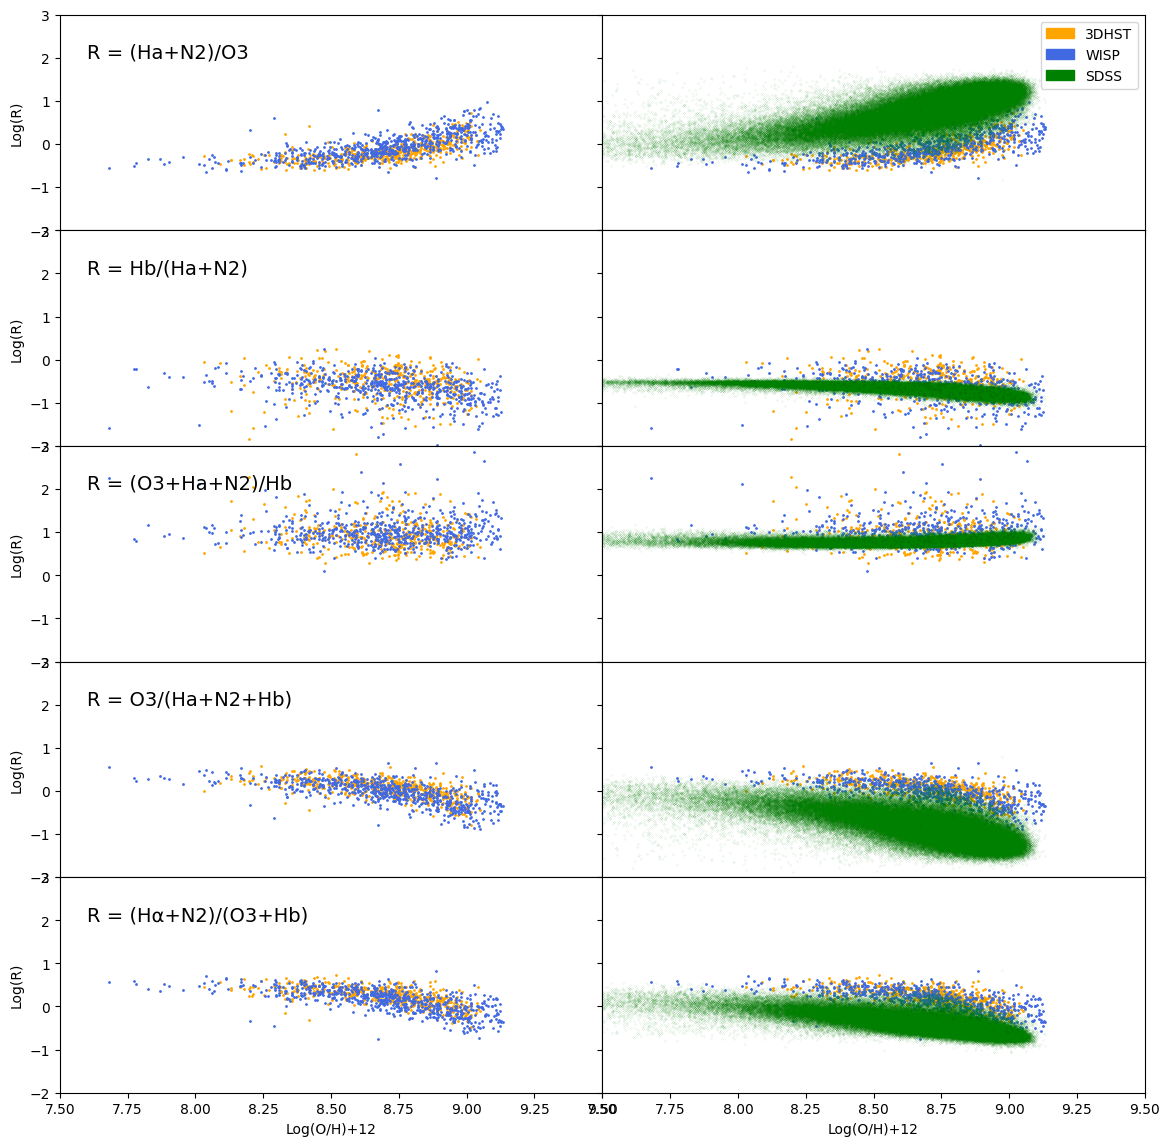

In [387]:
## Compare HST, SDSS (uncorrected)

p1a = mpatches.Patch(color='orange',label='3DHST')
p1b = mpatches.Patch(color='royalblue',label='WISP')
p1c = mpatches.Patch(color='green',label='SDSS')

fig = plt.figure(figsize=(14, 14))
gs = fig.add_gridspec(5,2,wspace=0, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
# Ha+N2 / O3
axs[0, 0].plot(x3D, HaN2_O3_3DHST, '.',markersize=2,color='orange')
axs[0, 0].plot(xWISP, HaN2_O3_WISP, '.',markersize=2,color='royalblue')
axs[0, 0].text(7.6,2,"R = (Ha+N2)/O3",size=14)
axs[0, 1].plot(x3D, HaN2_O3_3DHST, '.',markersize=2,color='orange')
axs[0, 1].plot(xWISP, HaN2_O3_WISP, '.',markersize=2,color='royalblue')
axs[0, 1].plot(xSDSS, HaN2_O3_Batt, '.',markersize=.1,color='green')
axs[0, 1].legend(handles=[p1a,p1b,p1c],loc='upper right')
#axs[0, 1].text(9,2,"R = R23",size=14)
# Hb / Ha+N2
axs[1,0].plot(x3D, Hb_HaN2_3DHST, '.',markersize=2,color='orange')
axs[1,0].plot(xWISP, Hb_HaN2_WISP, '.',markersize=2,color='royalblue')
axs[1,0].text(7.6,2,"R = Hb/(Ha+N2)",size=14)
axs[1,1].plot(x3D, Hb_HaN2_3DHST, '.',markersize=2,color='orange')
axs[1,1].plot(xWISP, Hb_HaN2_WISP, '.',markersize=2,color='royalblue')
axs[1,1].plot(xSDSS, Hb_HaN2_Batt, '.',markersize=.1,color='green')

## OIII + H⍺+NII / H𝛽  vs. metallicity
axs[2,0].plot(x3D, OIIIHaN2_Hb_3DHST, '.',markersize=2,color='orange')
axs[2,0].plot(xWISP, OIIIHaN2_Hb_WISP, '.',markersize=2,color='royalblue')
axs[2,0].text(7.6,2,"R = (O3+Ha+N2)/Hb",size=14)
axs[2,1].plot(x3D, OIIIHaN2_Hb_3DHST, '.',markersize=2,color='orange')
axs[2,1].plot(xWISP, OIIIHaN2_Hb_WISP, '.',markersize=2,color='royalblue')
axs[2,1].plot(xSDSS, OIIIHaN2_Hb_Batt, '.',markersize=.1,color='green')

## O3 / (Ha+N2)+Hb  vs. metallicity
axs[3,0].plot(x3D, OIII_HbHaN2_3DHST, '.',markersize=2,color='orange')
axs[3,0].plot(xWISP, OIII_HbHaN2_WISP, '.',markersize=2,color='royalblue')
axs[3,0].text(7.6,2,"R = O3/(Ha+N2+Hb)",size=14)
axs[3,1].plot(x3D, OIII_HbHaN2_3DHST, '.',markersize=2,color='orange')
axs[3,1].plot(xWISP, OIII_HbHaN2_WISP, '.',markersize=2,color='royalblue')
axs[3,1].plot(xSDSS, OIII_HbHaN2_Batt, '.',markersize=.1,color='green')

## H⍺+NII / OIII+H𝛽 
axs[4,0].plot(x3D, OIIIHb_HaN2_3DHST, '.',markersize=2,color='orange')
axs[4,0].plot(xWISP, OIIIHb_HaN2_WISP, '.',markersize=2,color='royalblue')
axs[4,0].text(7.6,2,"R = (H⍺+N2)/(O3+Hb)",size=14)
axs[4,1].plot(x3D, OIIIHb_HaN2_3DHST, '.',markersize=2,color='orange')
axs[4,1].plot(xWISP, OIIIHb_HaN2_WISP, '.',markersize=2,color='royalblue')
axs[4,1].plot(xSDSS, OIIIHb_HaN2_Batt, '.',markersize=.1,color='green')

for ax in axs.flat:
    ax.set(xlabel="Log(O/H)+12", ylabel="Log(R)")
    ax.set_xlim([7.5, 9.5])
    ax.set_ylim([-2, 3])
    #ax.legend("D16","SDSS Tre 04","Calc Tre 04")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

#plt.savefig("HSTvsSDSS7.11.pdf",format="pdf")

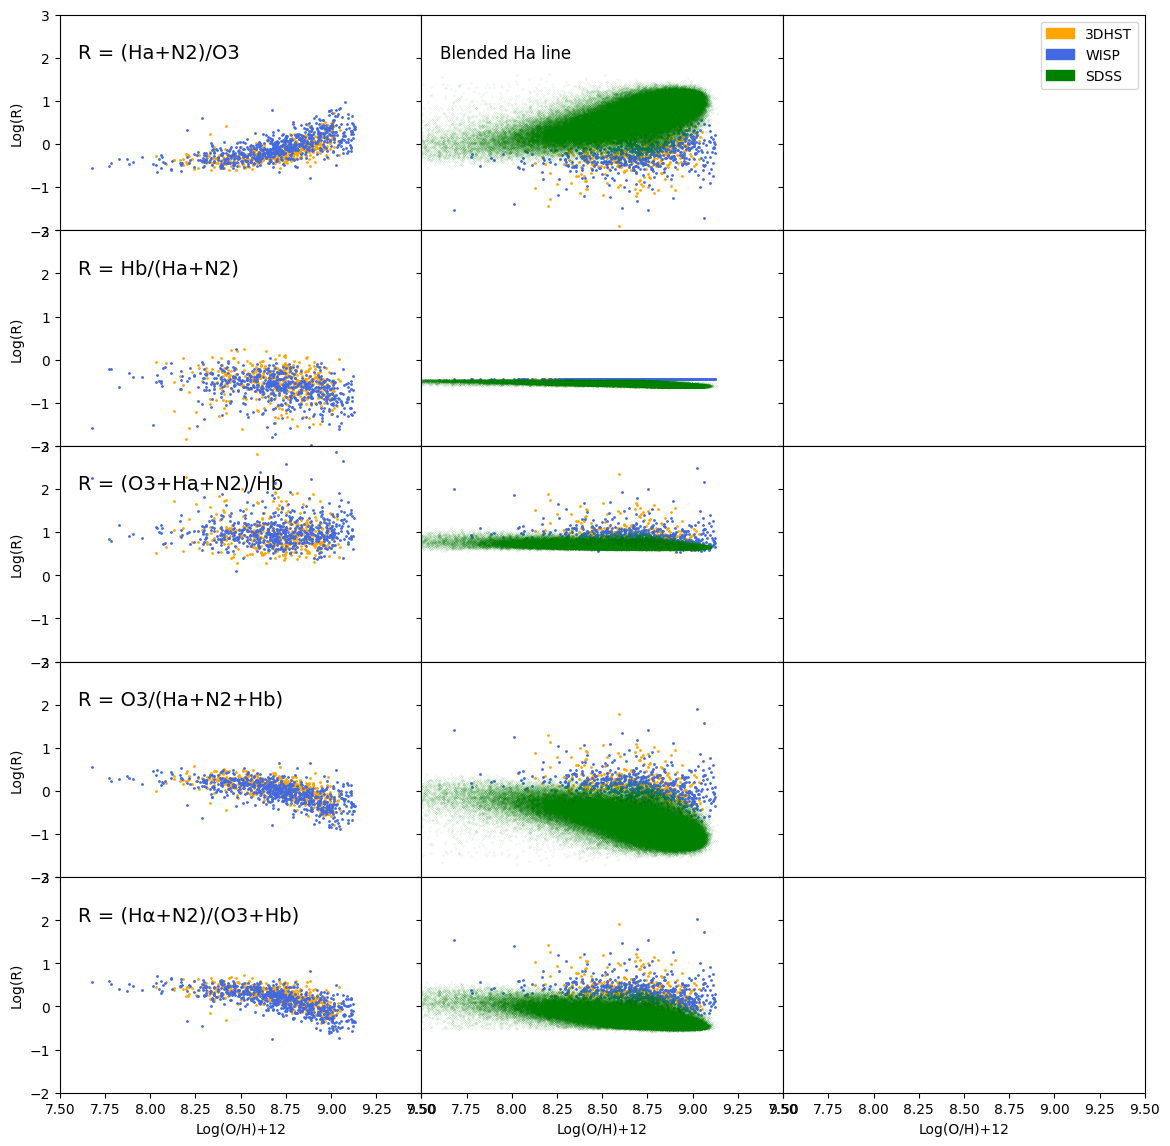

In [415]:
## HST vs SDSS, different correction methods

fig = plt.figure(figsize=(14, 14))
gs = fig.add_gridspec(5,3,wspace=0, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
# Ha+N2 / O3
# uncorrected
axs[0, 0].plot(x3D, HaN2_O3_3DHST, '.',markersize=2,color='orange')
axs[0, 0].plot(xWISP, HaN2_O3_WISP, '.',markersize=2,color='royalblue')
axs[0, 0].text(7.6,2,"R = (Ha+N2)/O3",size=14)
# blended line method
axs[0, 1].plot(x3D, HaN2_O3_3DHST_blend, '.',markersize=2,color='orange')
axs[0, 1].plot(xWISP, HaN2_O3_WISP_blend, '.',markersize=2,color='royalblue')
axs[0, 1].plot(xSDSS, HaN2_O3_Batt_int, '.',markersize=.1,color='green')
axs[0, 1].text(7.6,2,"Blended Ha line",size=12)
axs[0, 2].legend(handles=[p1a,p1b,p1c],loc='upper right')
#axs[0, 2].plot(xSDSS_dop_int, HaN2_O3_Batt_int, '.',markersize=.1,color='blue')
#axs[0, 2].plot(xSDSS2, HaN2_O3_Batt_int, '.',markersize=.1,color='royalblue')
#axs[0, 2].plot(xSDSS, HaN2_O3_Batt_int, '.',markersize=.1,color='deepskyblue')
#axs[0, 2].plot(xSDSS_dop_unc, HaN2_O3_Batt, '.',markersize=.1,color='darkred')
#axs[0, 2].plot(xSDSS2, HaN2_O3_Batt, '.',markersize=.1,color='red')
#axs[0, 2].plot(xSDSS, HaN2_O3_Batt, '.',markersize=.1,color='tomato')
#axs[0, 2].legend(handles=[p1l,p2l,p3l,p4l,p5l,p6l],loc='upper right')

# Hb / Ha+N2
# uncorrected
axs[1,0].plot(x3D, Hb_HaN2_3DHST, '.',markersize=2,color='orange')
axs[1,0].plot(xWISP, Hb_HaN2_WISP, '.',markersize=2,color='royalblue')
# blended
axs[1,0].text(7.6,2,"R = Hb/(Ha+N2)",size=14)
axs[1,1].plot(x3D, Hb_HaN2_3DHST_blend, '.',markersize=2,color='orange')
axs[1,1].plot(xWISP, Hb_HaN2_WISP_blend, '.',markersize=2,color='royalblue')
axs[1,1].plot(xSDSS, Hb_HaN2_Batt_int, '.',markersize=.1,color='green')

## OIII + H⍺+NII / H𝛽  vs. metallicity
# uncorrected
axs[2,0].plot(x3D, OIIIHaN2_Hb_3DHST, '.',markersize=2,color='orange')
axs[2,0].plot(xWISP, OIIIHaN2_Hb_WISP, '.',markersize=2,color='royalblue')
axs[2,0].text(7.6,2,"R = (O3+Ha+N2)/Hb",size=14)
# blended
axs[2,1].plot(x3D, OIIIHaN2_Hb_3DHST_blend, '.',markersize=2,color='orange')
axs[2,1].plot(xWISP, OIIIHaN2_Hb_WISP_blend, '.',markersize=2,color='royalblue')
axs[2,1].plot(xSDSS, OIIIHaN2_Hb_Batt_int, '.',markersize=.1,color='green')

## O3 / (Ha+N2)+Hb  vs. metallicity
# uncorrected
axs[3,0].plot(x3D, OIII_HbHaN2_3DHST, '.',markersize=2,color='orange')
axs[3,0].plot(xWISP, OIII_HbHaN2_WISP, '.',markersize=2,color='royalblue')
axs[3,0].text(7.6,2,"R = O3/(Ha+N2+Hb)",size=14)
# blended
axs[3,1].plot(x3D, OIII_HbHaN2_3DHST_blend, '.',markersize=2,color='orange')
axs[3,1].plot(xWISP, OIII_HbHaN2_WISP_blend, '.',markersize=2,color='royalblue')
axs[3,1].plot(xSDSS, OIII_HbHaN2_Batt_int, '.',markersize=.1,color='green')

## H⍺+NII / OIII+H𝛽 
# uncorrected
axs[4,0].plot(x3D, OIIIHb_HaN2_3DHST, '.',markersize=2,color='orange')
axs[4,0].plot(xWISP, OIIIHb_HaN2_WISP, '.',markersize=2,color='royalblue')
axs[4,0].text(7.6,2,"R = (H⍺+N2)/(O3+Hb)",size=14)
# blended
axs[4,1].plot(x3D, OIIIHb_HaN2_3DHST_blend, '.',markersize=2,color='orange')
axs[4,1].plot(xWISP, OIIIHb_HaN2_WISP_blend, '.',markersize=2,color='royalblue')
axs[4,1].plot(xSDSS, OIIIHb_HaN2_Batt_int, '.',markersize=.1,color='green')

for ax in axs.flat:
    ax.set(xlabel="Log(O/H)+12", ylabel="Log(R)")
    ax.set_xlim([7.5, 9.5])
    ax.set_ylim([-2, 3])
    #ax.legend("D16","SDSS Tre 04","Calc Tre 04")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


1.3588143410852722
0.07234976527392668


/tmp/ipykernel_1697784/377426905.py:41: RuntimeWarning: divide by zero encountered in divide
  p2 = plt.plot((np.log10((NII84_Batt_int+Halpha_Batt_int)/OII_Batt_int)),(np.log10(OIII_Batt_int/OII_Batt_int)), '.',markersize=.1)


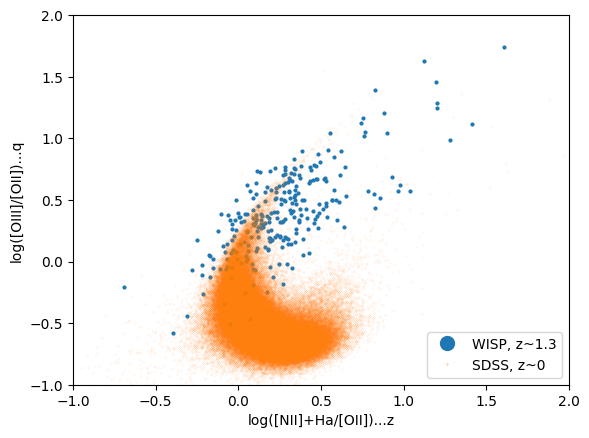

/tmp/ipykernel_1697784/377426905.py:55: RuntimeWarning: divide by zero encountered in divide
  p2 = plt.plot((np.log10((OIII_Batt_int+OII_Batt_int)/Hbeta_Batt_int)),(np.log10(OIII_Batt_int/OII_Batt_int)), '.',markersize=.1)


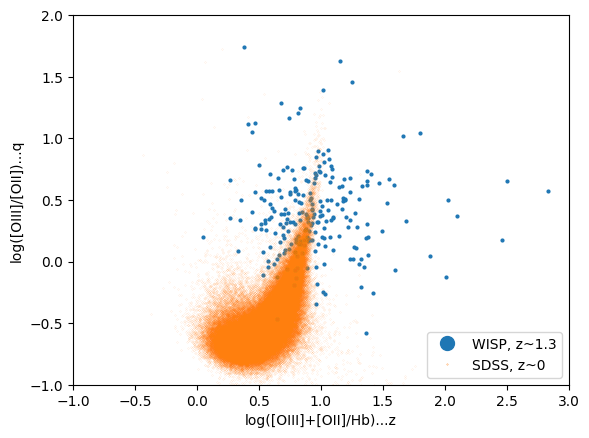

/tmp/ipykernel_1697784/377426905.py:76: RuntimeWarning: divide by zero encountered in divide
  p2 = plt.scatter(((NII84_Batt_int+Halpha_Batt_int)/OII_Batt_int),(OIII_Batt_int/OII_Batt_int),c=z_SDSS,s=.1)


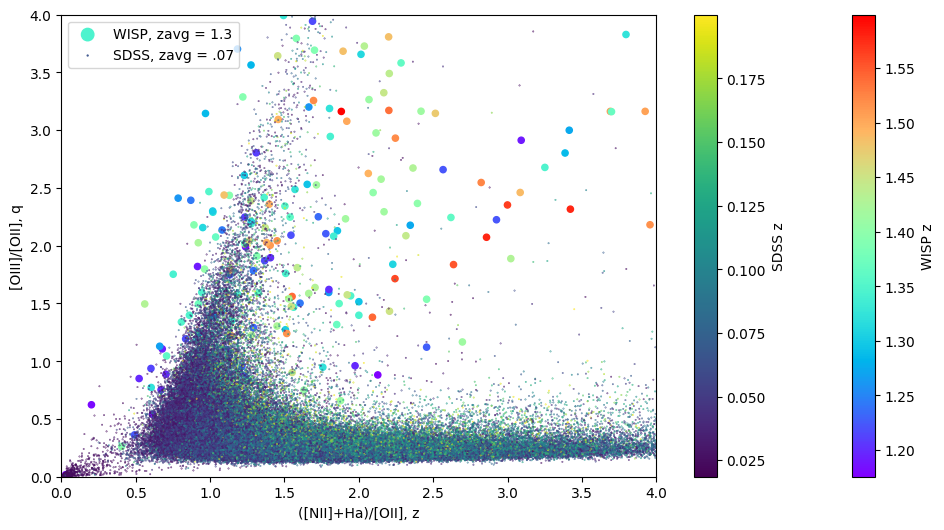

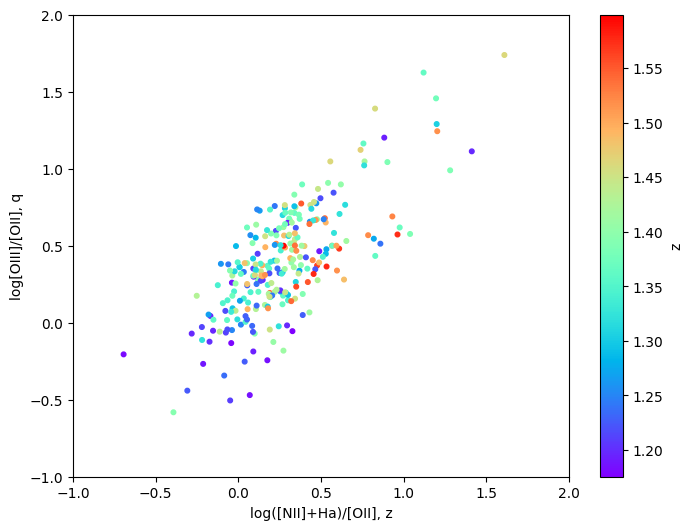

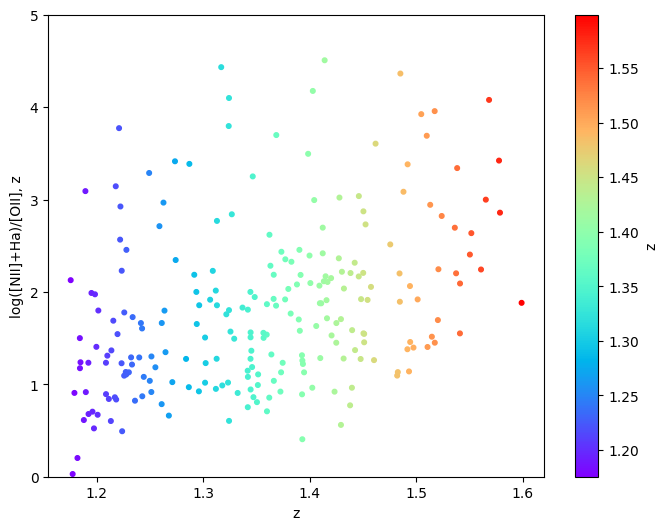

/tmp/ipykernel_1697784/377426905.py:129: RuntimeWarning: divide by zero encountered in divide
  p2 = plt.scatter(((NII84_Batt_int)/OII_Batt_int),(OIII_Batt_int/OII_Batt_int),c=z_SDSS,s=.1)


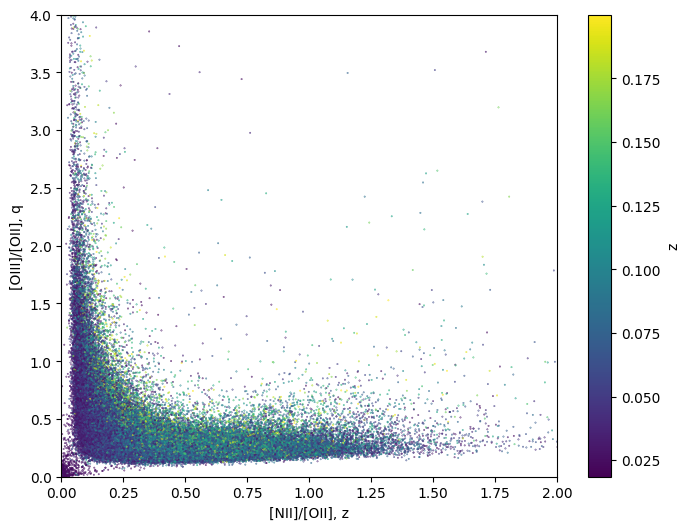

/tmp/ipykernel_1697784/377426905.py:147: RuntimeWarning: divide by zero encountered in divide
  p2 = plt.scatter(((OIII_Batt_int+OII_Batt_int)/Hbeta_Batt_int),(OIII_Batt_int/OII_Batt_int),c=z_SDSS,s=.1)


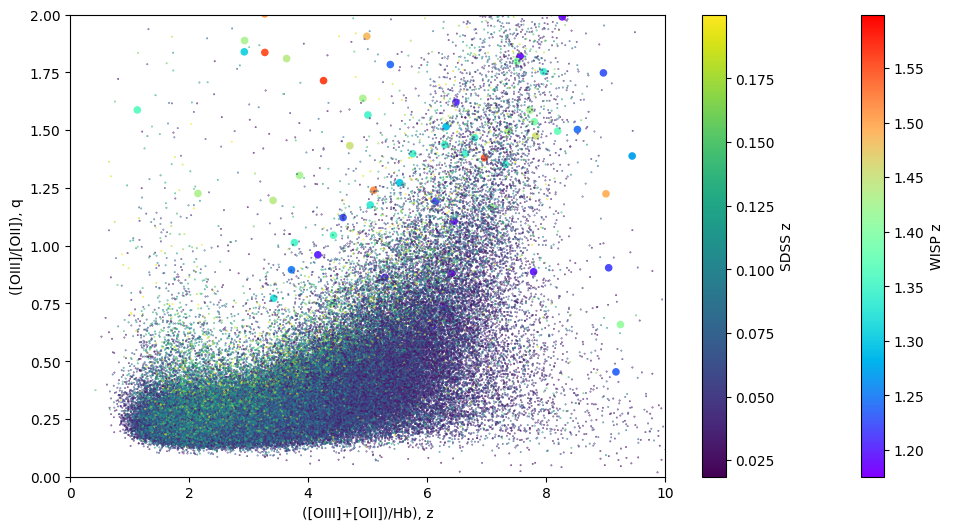

/tmp/ipykernel_1697784/377426905.py:167: RuntimeWarning: divide by zero encountered in divide
  p2 = plt.scatter((np.log10((OIII_Batt_int+OII_Batt_int)/Hbeta_Batt_int)),(np.log10(OIII_Batt_int/OII_Batt_int)),c=z_SDSS,s=.1)


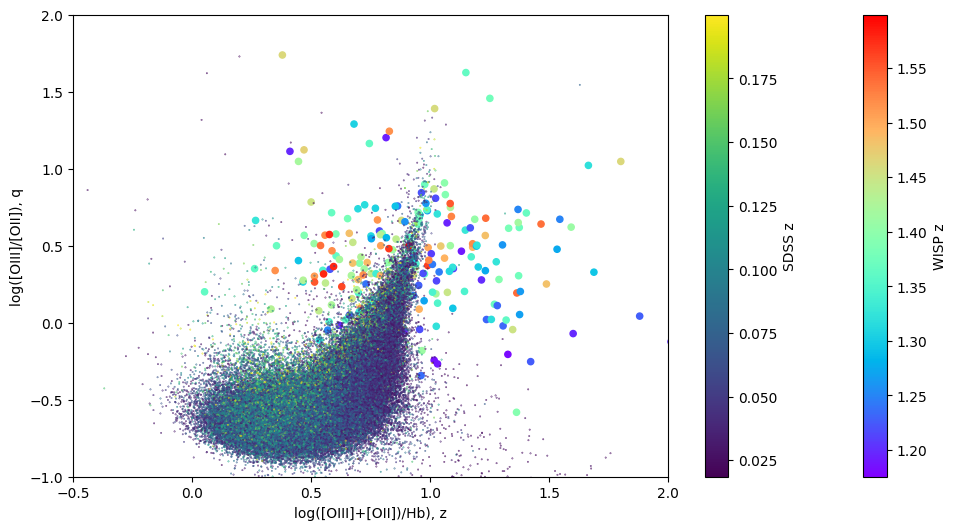

In [391]:
## Ionization parameter vs redshift diagnostics
# what paper does this come from? 
    #q           #z
#OIII/ OII vs NII+Ha/OII
#OIII/OII vs OIII+OII /Hb

## 3D HST DOES NOT HAVE OII
OIII_3DHST = SN_3DHST['foiii']
HaNII_3DHST = SN_3DHST['fhanii']
Hb_3DHST = SN_3DHST['fhb']
SII_3DHST = SN_3DHST['fsii']
OII_3DHST = SN_3DHST['foii']
#print((OII_3DHST))

## some OII missing from WISP, I assume due to redshift, filter out galaxies w no OII detections
WISP_w_OII = SN_WISP.loc[SN_WISP['foii'] > 0]
OII_WISP_w_OII = WISP_w_OII['foii']
OIII_WISP_w_OII = WISP_w_OII['foiii']
Hb_WISP_w_OII = WISP_w_OII['fhb']
HaN2_WISP_w_OII = WISP_w_OII['fhanii']
z_WISP_w_OII = WISP_w_OII['z']
# 258 galaxies to work from
#print(len(WISP_w_OII['foii']))

# Battisti SDSS 
#Halpha_Batt_int
#OII_Batt_int
#OIII_Batt_int
z_SDSS = BattistiSpecLine['z']

# Average z
# WISP
print(sum(WISP_w_OII['z']/len(WISP_w_OII['z'])))
# SDSS
print(sum(BattistiSpecProp['z']/len(BattistiSpecProp['z'])))


#OIII/ OII vs NII+Ha/OII

p1 = plt.plot((np.log10(HaN2_WISP_w_OII/OII_WISP_w_OII)),(np.log10(OIII_WISP_w_OII/OII_WISP_w_OII)), '.',markersize=4)
p2 = plt.plot((np.log10((NII84_Batt_int+Halpha_Batt_int)/OII_Batt_int)),(np.log10(OIII_Batt_int/OII_Batt_int)), '.',markersize=.1)
plt.xlabel("log([NII]+Ha/[OII])...z")
plt.ylabel("log([OIII]/[OII])...q")
plt.xlim([-1,2])
plt.ylim([-1,2])
#plt.text(7.6,2,"R = (H⍺+N2)/(O3+Hb)")
#plt.text(7.6,0.7,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
plt.legend((p1[0], p2[0]), ('WISP, z~1.3', 'SDSS, z~0'),fontsize=10,markerscale=5,loc='lower right')
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

#OIII/OII vs OIII+OII /Hb

p1 = plt.plot((np.log10((OIII_WISP_w_OII+OII_WISP_w_OII)/Hb_WISP_w_OII)),(np.log10(OIII_WISP_w_OII/OII_WISP_w_OII)), '.',markersize=4)
p2 = plt.plot((np.log10((OIII_Batt_int+OII_Batt_int)/Hbeta_Batt_int)),(np.log10(OIII_Batt_int/OII_Batt_int)), '.',markersize=.1)
#plt.plot(xSDSS, HaN2_OIIIHb_Batt, '.',markersize=.1)
plt.xlabel("log([OIII]+[OII]/Hb)...z")
plt.ylabel("log([OIII]/[OII])...q")
plt.xlim([-1,3])
plt.ylim([-1,2])
#plt.text(7.6,2,"R = (H⍺+N2)/(O3+Hb)")
#plt.text(7.6,0.7,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
plt.legend((p1[0], p2[0]), ('WISP, z~1.3', 'SDSS, z~0'),fontsize=10,markerscale=5,loc='lower right')
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

## Try scatter with redshift gradient 

#OIII/ OII vs NII+Ha/OII

fig = plt.figure(figsize=(12, 6))
#p1 = plt.scatter((np.log10(HaN2_WISP_w_OII/OII_WISP_w_OII)),(np.log10(OIII_WISP_w_OII/OII_WISP_w_OII)),c=z_WISP_w_OII,s=11)
p1 = plt.scatter((HaN2_WISP_w_OII/OII_WISP_w_OII),(OIII_WISP_w_OII/OII_WISP_w_OII),c=z_WISP_w_OII,cmap='rainbow',s=20)
plt.colorbar(label='WISP z')
#p2 = plt.scatter((np.log10((NII84_Batt_int+Halpha_Batt_int)/OII_Batt_int)),(np.log10(OIII_Batt_int/OII_Batt_int)),c=z_SDSS,s=.1)
p2 = plt.scatter(((NII84_Batt_int+Halpha_Batt_int)/OII_Batt_int),(OIII_Batt_int/OII_Batt_int),c=z_SDSS,s=.1)
plt.colorbar(label='SDSS z')
plt.xlabel("([NII]+Ha)/[OII], z")
plt.ylabel("[OIII]/[OII], q")
plt.xlim([0,4])
plt.ylim([0,4])
plt.legend((p1, p2), ('WISP, zavg = 1.3', 'SDSS, zavg = .07'),fontsize=10,markerscale=2,loc='upper left')
#plt.text(7.6,2,"R = (H⍺+N2)/(O3+Hb)")
#plt.text(7.6,0.7,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

#OIII/ OII vs NII+Ha/OII, LOGGED VALUES

fig = plt.figure(figsize=(8, 6))
p1 = plt.scatter((np.log10(HaN2_WISP_w_OII/OII_WISP_w_OII)),(np.log10(OIII_WISP_w_OII/OII_WISP_w_OII)),c=z_WISP_w_OII,cmap='rainbow',s=11)
#p1 = plt.scatter((HaN2_WISP_w_OII/OII_WISP_w_OII),(OIII_WISP_w_OII/OII_WISP_w_OII),c=z_WISP_w_OII,cmap='rainbow',s=20)
plt.colorbar(label='z')
#p2 = plt.scatter((np.log10((NII84_Batt_int+Halpha_Batt_int)/OII_Batt_int)),(np.log10(OIII_Batt_int/OII_Batt_int)),c=z_SDSS,s=.1)
#p2 = plt.scatter(((NII84_Batt_int+Halpha_Batt_int)/OII_Batt_int),(OIII_Batt_int/OII_Batt_int),c=z_SDSS,s=.1)
#plt.colorbar(label='z')
plt.xlabel("log([NII]+Ha)/[OII], z")
plt.ylabel("log[OIII]/[OII], q")
plt.xlim([-1,2])
plt.ylim([-1,2])
#plt.legend((p1, p2), ('WISP, zavg = 1.3', 'SDSS, zavg = .07'),fontsize=10,markerscale=2,loc='upper left')
#plt.text(7.6,2,"R = (H⍺+N2)/(O3+Hb)")
#plt.text(7.6,0.7,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

# NII+Ha/OII vs z

fig = plt.figure(figsize=(8, 6))
p1 = plt.scatter(z_WISP_w_OII,(HaN2_WISP_w_OII/OII_WISP_w_OII),c=z_WISP_w_OII,cmap='rainbow',s=11)
#p1 = plt.scatter((HaN2_WISP_w_OII/OII_WISP_w_OII),(OIII_WISP_w_OII/OII_WISP_w_OII),c=z_WISP_w_OII,cmap='rainbow',s=20)
plt.colorbar(label='z')
#p2 = plt.scatter((np.log10((NII84_Batt_int+Halpha_Batt_int)/OII_Batt_int)),(np.log10(OIII_Batt_int/OII_Batt_int)),c=z_SDSS,s=.1)
#p2 = plt.scatter(((NII84_Batt_int+Halpha_Batt_int)/OII_Batt_int),(OIII_Batt_int/OII_Batt_int),c=z_SDSS,s=.1)
#plt.colorbar(label='z')
plt.xlabel("z")
plt.ylabel("log([NII]+Ha)/[OII], z")
#plt.xlim([-1,2])
plt.ylim([0,5])
#plt.legend((p1, p2), ('WISP, zavg = 1.3', 'SDSS, zavg = .07'),fontsize=10,markerscale=2,loc='upper left')
#plt.text(7.6,2,"R = (H⍺+N2)/(O3+Hb)")
#plt.text(7.6,0.7,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

#OIII/OII vs NII/OII, SDSS

fig = plt.figure(figsize=(8, 6))
p2 = plt.scatter(((NII84_Batt_int)/OII_Batt_int),(OIII_Batt_int/OII_Batt_int),c=z_SDSS,s=.1)
plt.colorbar(label='z')
plt.xlabel("[NII]/[OII], z")
plt.ylabel("[OIII]/[OII], q")
plt.xlim([0,2])
plt.ylim([0,4])
#plt.legend((p1, p2), ('WISP, zavg = 1.3', 'SDSS, zavg = .07'),fontsize=10,markerscale=2,loc='upper left')
#plt.text(7.6,2,"R = (H⍺+N2)/(O3+Hb)")
#plt.text(7.6,0.7,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

#OIII/OII vs OIII+OII /Hb

fig = plt.figure(figsize=(12, 6))
#p1 = plt.scatter((np.log10((OIII_WISP_w_OII+OII_WISP_w_OII)/Hb_WISP_w_OII)),(np.log10(OIII_WISP_w_OII/OII_WISP_w_OII)),c=z_WISP_w_OII,s=11)
p1 = plt.scatter(((OIII_WISP_w_OII+OII_WISP_w_OII)/Hb_WISP_w_OII),(OIII_WISP_w_OII/OII_WISP_w_OII),c=z_WISP_w_OII,cmap='rainbow',s=20)
plt.colorbar(label='WISP z')
p2 = plt.scatter(((OIII_Batt_int+OII_Batt_int)/Hbeta_Batt_int),(OIII_Batt_int/OII_Batt_int),c=z_SDSS,s=.1)
plt.colorbar(label='SDSS z')
#plt.plot(xSDSS, HaN2_OIIIHb_Batt, '.',markersize=.1)
#plt.xlabel("log([OIII]+[OII]/Hb)...z")
#plt.ylabel("log([OIII]/[OII])...q")
plt.xlabel("([OIII]+[OII])/Hb), z")
plt.ylabel("([OIII]/[OII]), q")
plt.xlim([0,10])
plt.ylim([0,2])
#plt.text(7.6,2,"R = (H⍺+N2)/(O3+Hb)")
#plt.text(7.6,0.7,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()

#OIII/OII vs OIII+OII /Hb LOGGED

fig = plt.figure(figsize=(12, 6))
p1 = plt.scatter((np.log10((OIII_WISP_w_OII+OII_WISP_w_OII)/Hb_WISP_w_OII)),(np.log10(OIII_WISP_w_OII/OII_WISP_w_OII)),c=z_WISP_w_OII,cmap='rainbow',s=20)
#p1 = plt.scatter(((OIII_WISP_w_OII+OII_WISP_w_OII)/Hb_WISP_w_OII),(OIII_WISP_w_OII/OII_WISP_w_OII),c=z_WISP_w_OII,cmap='rainbow',s=20)
plt.colorbar(label='WISP z')
p2 = plt.scatter((np.log10((OIII_Batt_int+OII_Batt_int)/Hbeta_Batt_int)),(np.log10(OIII_Batt_int/OII_Batt_int)),c=z_SDSS,s=.1)
plt.colorbar(label='SDSS z')
#plt.plot(xSDSS, HaN2_OIIIHb_Batt, '.',markersize=.1)
#plt.xlabel("log([OIII]+[OII]/Hb)...z")
#plt.ylabel("log([OIII]/[OII])...q")
plt.xlabel("log([OIII]+[OII])/Hb), z")
plt.ylabel("log([OIII]/[OII]), q")
plt.xlim([-0.5,2])
plt.ylim([-1,2])
#plt.text(7.6,2,"R = (H⍺+N2)/(O3+Hb)")
#plt.text(7.6,0.7,"Battisti 22 star-formation galaxy data (from SDSS DR8)",size=5)
#plt.savefig("(OIII_Hbeta)_(NII84+Halpha).pdf",format="pdf")
plt.show()
# IDK what to make of it

In [320]:
## EW ratios 
# EW(OIII)/EW(OII) vs EW(niiha)/ EW(SII…Hb…OII)

# Only have EW for OIII and hanii

